## 파이썬에서 결측값 처리하기

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [3]:
from IPython.display import display

In [4]:
import pandas as pd # pandas 라이브러리 불러오기
data = {'이름': ['홍길동', '이몽룡', '성춘향', '변학도'],
'나이': [25, 30, 22, None],
'성별': ['남', '남', '여', '남'],
'키': [175.5, 180.0, None, 167.5]
} # DataFrame 생성
df = pd.DataFrame(data)
df

,이름,나이,성별,키
0,홍길동,25.0,남,175.5
1,이몽룡,30.0,남,180.0
2,성춘향,22.0,여,NaN
3,변학도,NaN,남,167.5


In [5]:
df.isnull() # 결측치 확인

,이름,나이,성별,키
0,False,False,False,False
1,False,False,False,False
2,False,False,False,True
3,False,True,False,False


### df.dropna(axis = 0, how = '', thresh = '', subset ='', inplace = '') : 결측치 제거

In [7]:
df.dropna(axis = 0, how = 'any', subset = None, inplace = False)
# default: 0 (행 방향), inplace : 원본 배열 변경 여부
## thresh=None, subset=None 동시에 지정 불ㄹ가

,이름,나이,성별,키
0,홍길동,25.0,남,175.5
1,이몽룡,30.0,남,180.0


In [8]:
df_cleaned = df.dropna(axis = 0, subset = ['키']) # '키' 행의 결측치만 제거
df_cleaned

,이름,나이,성별,키
0,홍길동,25.0,남,175.5
1,이몽룡,30.0,남,180.0
3,변학도,NaN,남,167.5


In [9]:
df_cleaned = df.dropna(axis = 0, how = 'all') # default : any, 
## any = NaN 값을 하나라도 갖는 행 제거
## all = 모든 값이 전부 NaN인 행만 제거?
df_cleaned

,이름,나이,성별,키
0,홍길동,25.0,남,175.5
1,이몽룡,30.0,남,180.0
2,성춘향,22.0,여,NaN
3,변학도,NaN,남,167.5


In [10]:
df_cleaned = df.dropna(axis = 1) # 열 방향
#df_cleanded_2 = df.dropna(axis = 'columnns') # 같은 표현
display(df_cleaned)
#display(df_cleaned_2)

,이름,성별
0,홍길동,남
1,이몽룡,남
2,성춘향,여
3,변학도,남


### df.fillna(value = None, values = None) : 결측치 대체하기 

In [12]:
df2 = df.fillna(0) # 결측치 0으로 대체
df2

,이름,나이,성별,키
0,홍길동,25.0,남,175.5
1,이몽룡,30.0,남,180.0
2,성춘향,22.0,여,0.0
3,변학도,0.0,남,167.5


In [13]:
df['나이'].mean()
df2 = df['나이'].fillna(df['나이'].mean()) # return Series, return DataFrame 하려면?
display(df2) # 나이 열의 결측치를 평균으로 대체

0    25.000000
1    30.000000
2    22.000000
3    25.666667
Name: 나이, dtype: float64

In [14]:
mean_height = df['키'].mean()
mean_age = df['나이'].mean()

df_filled = df.fillna({'나이' : mean_age , '키' : mean_height})
df_filled

,이름,나이,성별,키
0,홍길동,25.000000,남,175.500000
1,이몽룡,30.000000,남,180.000000
2,성춘향,22.000000,여,174.333333
3,변학도,25.666667,남,167.500000


In [15]:
df['나이'].median() # 중간값, 홀수면 1개, 짝수면 2개

25.0

In [16]:
data = {'이름': ['홍길동', '이몽룡', '성춘향', '변학도'],
'나이': [30, 30, 22, None],
'성별': ['남', '남', '여', '남'],
'키': [175.5, 180.0, None, 167.5]
} # DataFrame 생성
df_2 = pd.DataFrame(data)
df

,이름,나이,성별,키
0,홍길동,25.0,남,175.5
1,이몽룡,30.0,남,180.0
2,성춘향,22.0,여,NaN
3,변학도,NaN,남,167.5


In [17]:
mod = df['나이'].mode() # 최빈값을 Series로 return, 개수가 같으면 모두 return한다.
mod1 = df_2['나이'].mode()
display(mod)
display(mod1)

0    22.0
1    25.0
2    30.0
Name: 나이, dtype: float64

0    30.0
Name: 나이, dtype: float64

In [18]:
type(mod)

pandas.core.series.Series

In [19]:
df['나이'].mode()[1] # 0번째 행

25.0

### 시계열 데이터의 경우 앞의 값 or 뒤의 값으로 결측치를 대체할 필요가 있는데, df.fillna(method = 'ffill') or df.fillna(method = 'bfill')을 통해 구현한다.

In [21]:
df

,이름,나이,성별,키
0,홍길동,25.0,남,175.5
1,이몽룡,30.0,남,180.0
2,성춘향,22.0,여,NaN
3,변학도,NaN,남,167.5


In [22]:
df3 = df.fillna(method = 'ffill') # // method = pad'
df4 = df.fillna(method = 'bfill') # // method = 'backfill'
display(df3)
display(df4) # 뒤의 데이터가 없으면 채워지지 않는다.

,이름,나이,성별,키
0,홍길동,25.0,남,175.5
1,이몽룡,30.0,남,180.0
2,성춘향,22.0,여,180.0
3,변학도,22.0,남,167.5


,이름,나이,성별,키
0,홍길동,25.0,남,175.5
1,이몽룡,30.0,남,180.0
2,성춘향,22.0,여,167.5
3,변학도,NaN,남,167.5


### 실습 예제 1 타이타닉 데이터셋

In [24]:
import seaborn as sns
import pandas as pd

In [25]:
titanic = sns.load_dataset('titanic')

In [26]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
titanic.isnull() # 전체 데이터프레임에 대해 결측치가 있는지 boolean 값으로 표시

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
titanic.isna() # 전체 데이터프레임에 대해 결측치가 있는지 boolean 값으로 표시, isnull()과 같은 함수이다.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


`df.isnull()`과 `df.isna()`는 **Pandas**에서 결측값을 확인하는 데 사용되는 함수들로, 기능적으로는 동일합니다. 두 함수 모두 결측값(NaN)을 `True`로 표시하고, 결측값이 아닌 값을 `False`로 표시하는 DataFrame을 반환합니다.

### 차이점:
- **`df.isnull()`**: 더 직관적인 이름으로, 결측값(null)을 확인할 때 사용됩니다.
- **`df.isna()`**: Pandas 0.21.0 버전부터 도입되었으며, `isnull()` 함수의 별칭입니다.

즉, **기능상의 차이는 없고** 이름만 다를 뿐입니다.

In [30]:
titanic.isnull().sum() # 결측치를 가진 행의 개수를 열 별로 표시

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [31]:
titanic['age'].mean()

29.69911764705882

In [32]:
titanic['age'].fillna(titanic['age'].mean()) # inFlace = False

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [33]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

`inplace=False` 옵션은 원본 `DataFrame`을 변경하지 않고, 결측치를 채운 새로운 `Series`나 `DataFrame`을 반환합니다. 그래서 `inplace=True`를 사용하지 않고도 결측치를 채운 전체 `DataFrame`을 반환할 수 있는 방법은 다음과 같습니다.

`fillna()` 메소드를 사용하여 **새로운 `DataFrame`**에서 결측치를 채운 데이터를 반환하는 방법은 단순히 그 결과를 변수에 할당하는 것입니다:

```python
# 결측치를 채운 새로운 DataFrame을 반환
titanic_filled = titanic.copy()  # 원본을 보존하고 새로운 DataFrame으로 작업
titanic_filled['age'] = titanic_filled['age'].fillna(titanic['age'].mean())

# titanic_filled는 결측치가 채워진 DataFrame입니다.
```

위 코드에서 `titanic_filled`는 결측치가 채워진 새로운 DataFrame을 갖게 됩니다. 이렇게 하면 원본 `titanic` DataFrame은 변하지 않고, 결측치가 채워진 결과를 사용할 수 있습니다.

## Matplotlib : 시각화 라이브러리 

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

%matplotlib inline

### 점을 인자로 제공하면 선분이 그려진다.

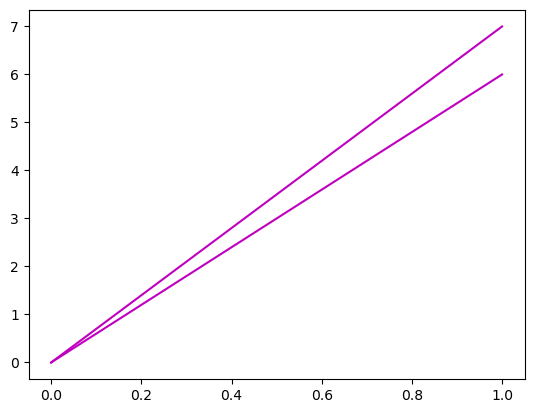

In [38]:
plt.plot([(0,0),(7,6)],'m') # 색 : 마젠타, 이렇게 순서쌍을 제공해도 되지만
plt.show()

In [39]:
x_axis = np.array([0,2,4,6])
y_axis = np.array([0,120,60,200])

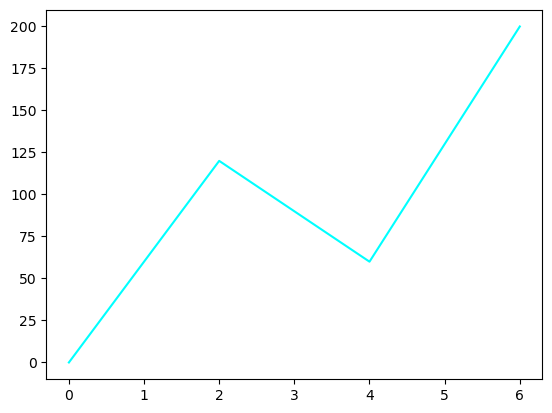

In [40]:
plt.plot(x_axis, y_axis, 'cyan') # 순서쌍을 리스트로 제공, 색을 'r' // 'red'로 지정, default : blue
## 원소의 개수가 다르면 그려지지 않는다
## ValueError: x and y must have same first dimension, but have shapes (3,) and (4,)
plt.show()

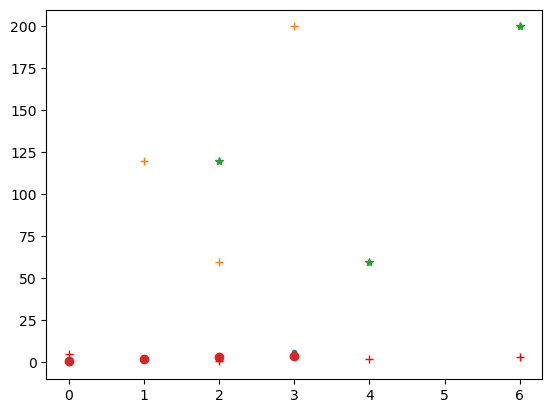

In [41]:
plt.plot(x_axis, '.') # 인자를 "."으로 지정하면 그래프가 아닌 좌표가 그려진다, 
plt.plot(y_axis, '+')
plt.plot(x_axis, y_axis, '*')
plt.plot([1,2,3,4],'o')
plt.plot(x_axis,[5,1,2,3],'r+') # 빨간색의 + 마커로 표시
# plt.plot(x_axis, y_axis, '#')
# ValueError: '#' is not a valid format string (unrecognized character '#')
plt.show()

### x 좌표 생략하기

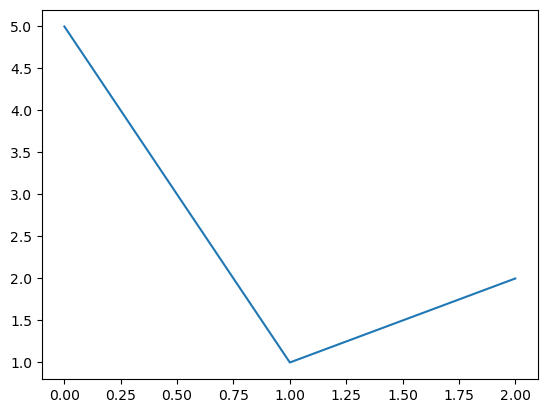

In [43]:
y_axis = np.array([5,1,2])
plt.plot(y_axis)
plt.show()

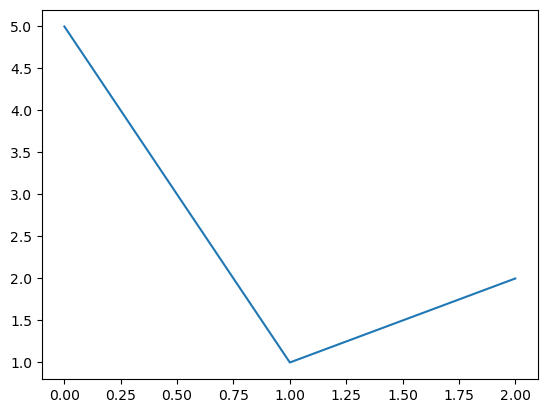

In [44]:
y_axis = np.array([5,1,2])
plt.plot(y_axis)
plt.show()
plt.close('all') # 이 세션에서 열려 있는 그래프를 지운다. 근데 안 지워지네?

### 마커

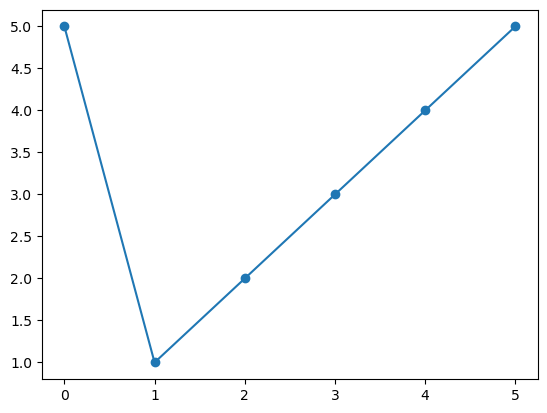

In [46]:
y_points = np.array([5,1,2,3,4,5])
plt.plot(y_points, marker ='o') # 점 강조
plt.show()

### 선 - 마커 형식

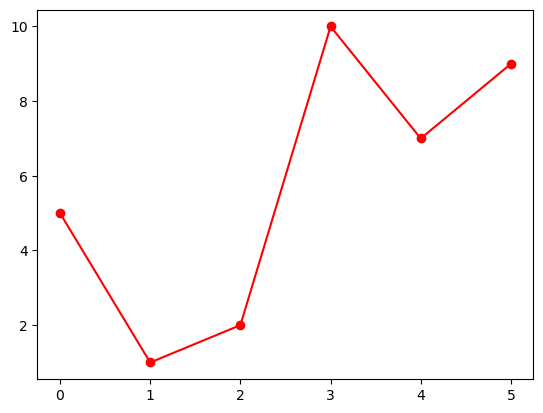

In [48]:
y_points = np.array([5,1,2,10,7,9])

plt.plot(y_points, 'o-r') # 마커 o , 색상 : red
plt.show()

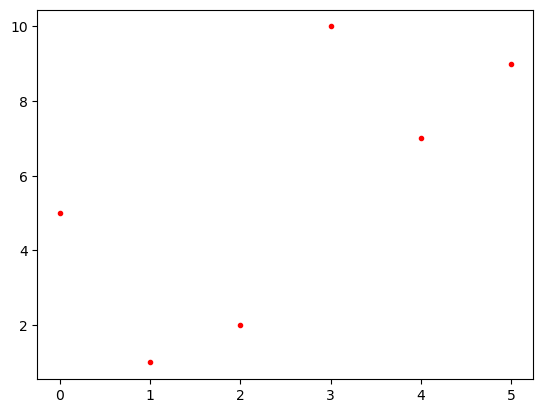

In [49]:
plt.plot(y_points, 'r.')
plt.show()

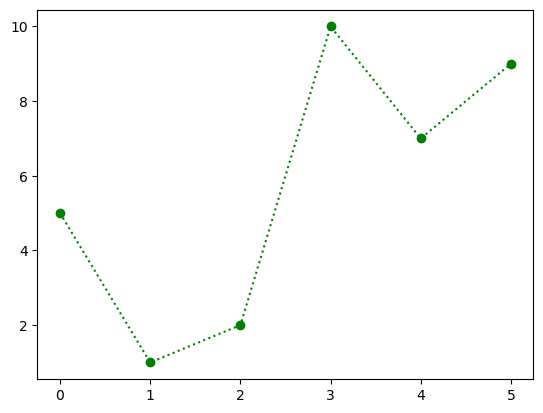

In [50]:
plt.plot(y_points, 'o:g') # 마커, 점선, 색상
plt.show()

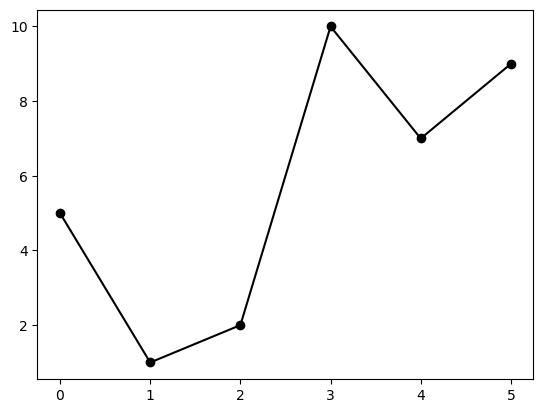

In [51]:
plt.plot(y_points, 'o-k') # 마커 o, 실선, 색상: 검정색
plt.show()

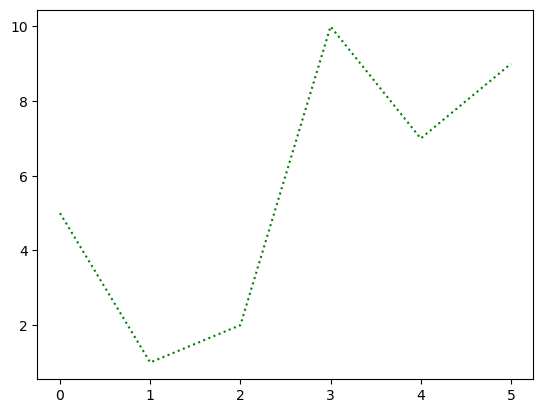

In [52]:
plt.plot(y_points, ':g')
plt.show()

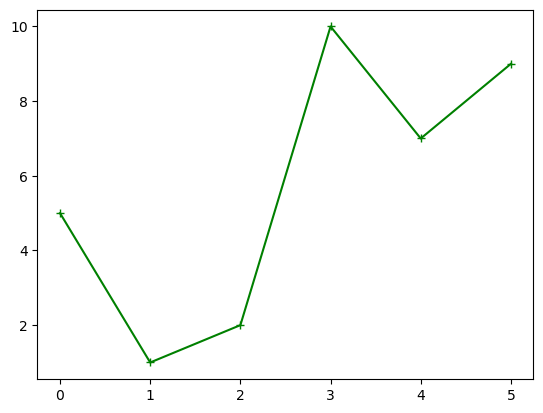

In [53]:
plt.plot(y_points, 'g-+') # 마커 : + , 실선, 색 : green, 
plt.show()

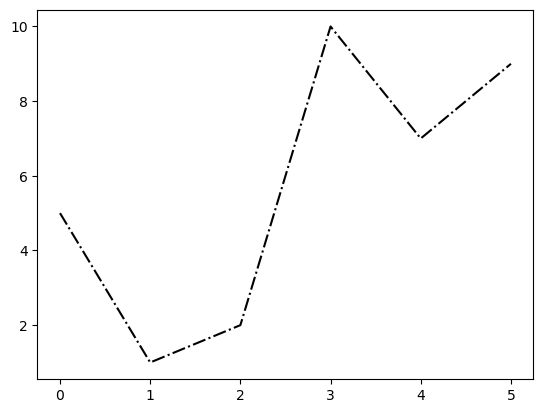

In [54]:
plt.plot(y_points, '-.k') # 마커 : + , 실선, 색 : green, 
plt.show()

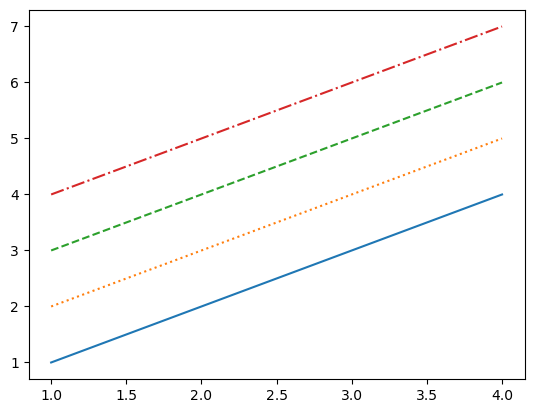

In [17]:
x = np.asarray([1, 2, 3, 4])
plt.plot(x, x+0, linestyle="-")
plt.plot(x, x+1, linestyle=":")
plt.plot(x, x+2, linestyle="--")
plt.plot(x, x+3, linestyle="-.")

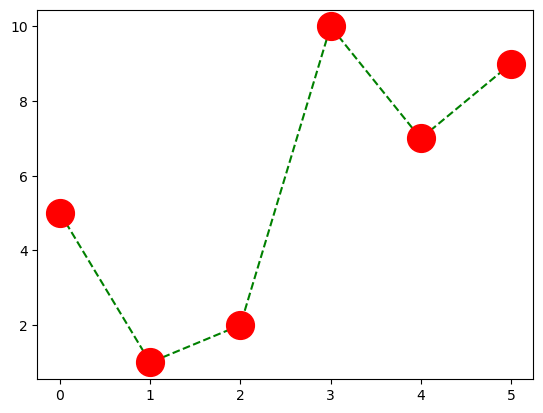

In [19]:
y_points = np.array([5, 1, 2, 10, 7, 9])
plt.plot(y_points, 'o--g', ms=20, mfc='r', mec='r')

### 

ms = 마커 크기. mfc = 마커 내부 색, mec = 마커 가장자리 색 ls = 선 모양, c = 선 색깔

선 기호 문자열
'-' 'solid'
':' 'dotted'
'––' 'dashed'
'-.' 'dashdot'
y_points

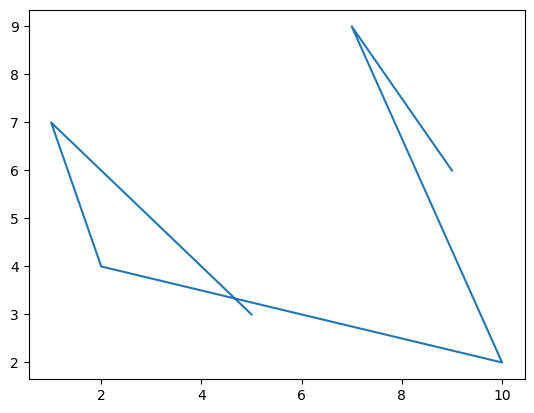

In [15]:
x1 = np.array([0, 1, 3, 5, 7, 10])
y1 = np.array([5, 1, 2, 10, 7, 9])
x2 = np.array([0, 2, 4, 6, 8, 10])
y2 = np.array([3, 7, 4, 2, 9, 6])
plt.plot(y1, y2)
plt.show()

In [59]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/Youth.ttf"
font_y = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_y)

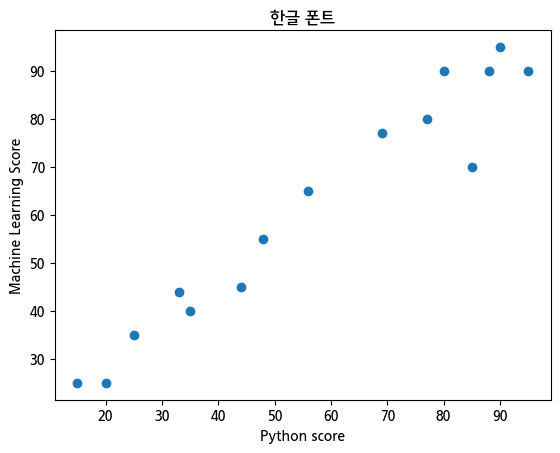

In [60]:
x = np.array([25, 80, 85, 35, 48, 90, 95, 77, 88, 56, 15, 20, 33, 69, 44])
y = np.array([35, 90, 70, 40, 55, 95, 90, 80, 90, 65, 25, 25, 44, 77, 45])
plt.xlabel("Python score")
plt.ylabel("Machine Learning Score")
plt.title("한글 폰트")
plt.plot(x, y, 'o')
plt.show()

### loc 옵션 인자를 이용하여 타이틀의 위치를 왼쪽(left), 오른쪽(right), 또는 중앙(center)에 위치시킬 수 있다. 기본값은 중앙이다.

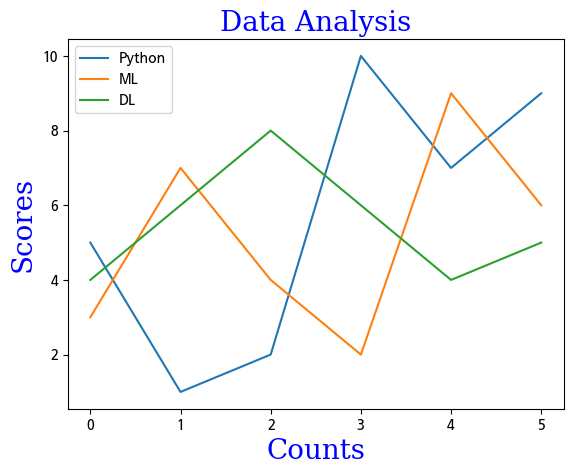

In [62]:
font1 = {'family':'serif', 'color':'blue', 'size':20}
font2 = {'family':'serif', 'color':'darkred', 'size':14}
y1 = np.array([5, 1, 2, 10, 7, 9])
y2 = np.array([3, 7, 4, 2, 9, 6])
y3 = np.array([4, 6, 8, 6, 4, 5])
plt.plot(y1, label='Python') # 범례에 사용할 라벨 지정
plt.plot(y2, label='ML')
plt.plot(y3, label='DL')
plt.legend() # 범례 설정, 여백에 # plot1,2,3에 라벨링
plt.xlabel("Counts", fontdict=font1)
plt.ylabel("Scores", fontdict=font1)
plt.title("Data Analysis", fontdict=font1)
plt.show()

### plt.grid() : 격자무늬 생성

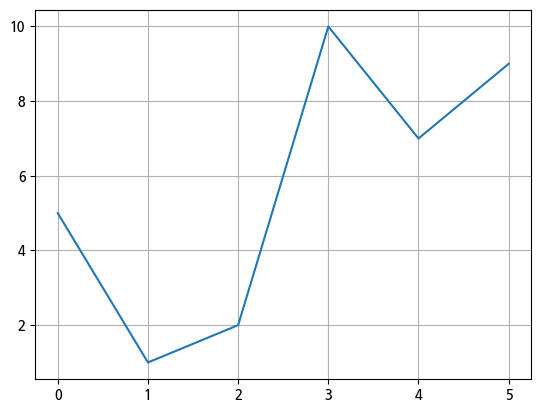

In [64]:
y_points = np.array([5, 1, 2, 10, 7, 9])
plt.plot(y_points)
plt.grid()
plt.show()

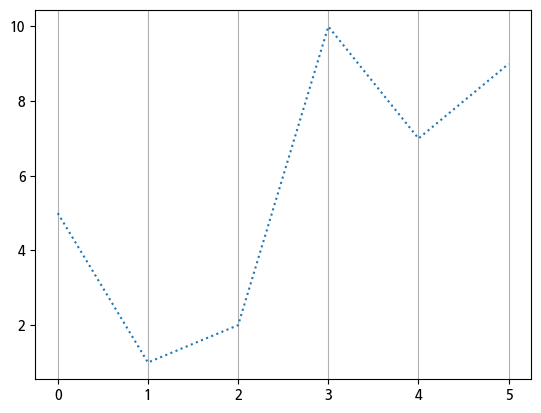

In [65]:
y_points = np.array([5, 1, 2, 10, 7, 9])
plt.plot(y_points, ls = 'dotted') # 점선
plt.grid(axis='x') 
plt.show()

### 정의역, 공역 지정 : plt.axis()

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Youth.
  fig.canvas.print_figure(bytes_io, **kw)


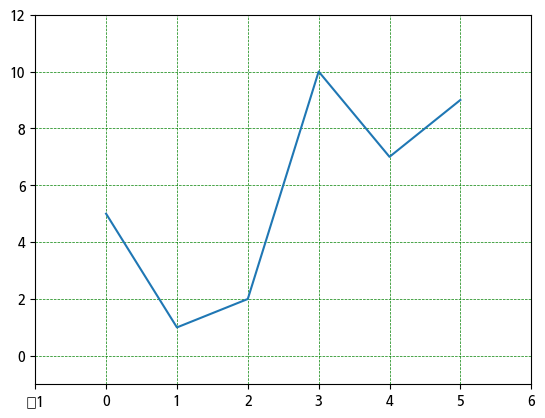

In [67]:
y_points = np.array([5, 1, 2, 10, 7, 9])
plt.plot(y_points)
plt.grid(color ='green', linestyle ='--', linewidth =0.5) # 선 스타일 : 파선, 선너비 = 0.5 (격자 무늬) 
plt.axis([-1, 6, -1, 12]) # 정의역 Min , 정의역 Max, 공역 Min , 공역 Max
plt.show()

### plt.hist() : 히스토그램 그리기

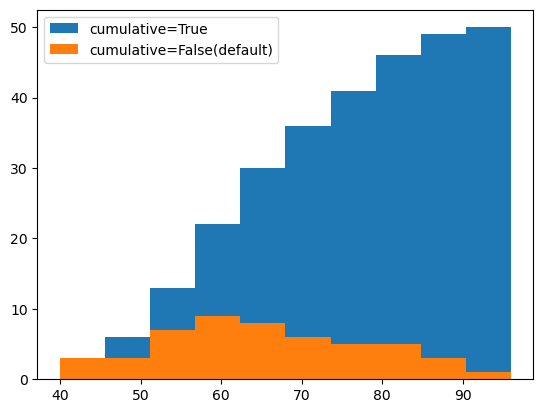

In [66]:
score = [63, 73, 52, 76, 67, 68, 70, 64, 54, 40, 80, 65, 49, 83, 65, 51, 54,
79, 78, 88, 55, 58, 57, 43, 96, 85, 55, 66, 65, 78, 62, 82, 60, 52,
45, 61, 71, 72, 81, 83, 62, 58, 72, 86, 50, 65, 78, 59, 61, 56]
plt.hist(score, cumulative=True, label='cumulative=True')
plt.hist(score, cumulative=False, label='cumulative=False(default)') # 히스토그램
plt.legend(loc='upper left')

### 참고 : 그래프 비율

그래프 눈금 스케일 설정(aspect ratio)
• x-축과 y-축에 사용되는 척도를 통일시킬 수 있다.
• plt.gca() 함수는 현재 그래프에 사용된 (x, y)-축의 눈금을 생성한다.
<Axes: > 상단 우측 그림
• plt.gca().set_aspect() 함수에서 실제 비율을 반영하려면 "equal" 옵션으로 설정한다.



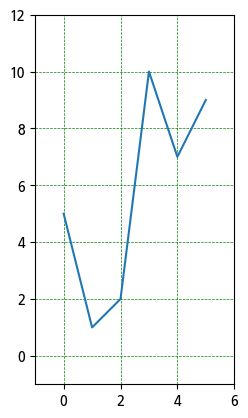

In [70]:
y_points = np.array([5, 1, 2, 10, 7, 9])
plt.plot(y_points)
plt.grid(color ='green', linestyle ='--', linewidth =0.5)
plt.axis([-1, 6, -1, 12]) # x-축, y-축의 범위
plt.gca().set_aspect("equal")
plt.show()

### fig, ax = plt.subplots(2, 2) : 여러 개의 그래프를 한 페이지에 생성, 컨테이너, 공간(배열 형태) ,행 수, 열 수

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Youth.
  fig.canvas.print_figure(bytes_io, **kw)


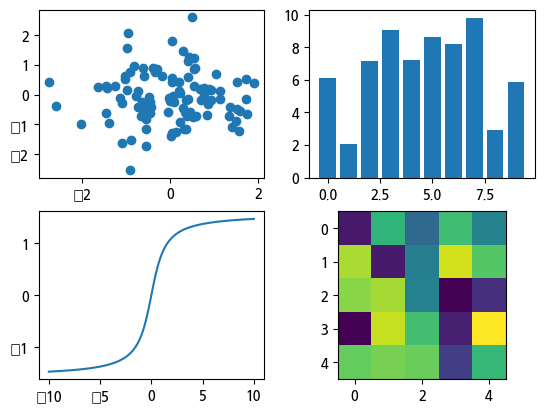

In [72]:
fig, ax = plt.subplots(2, 2) # 2행 2열의 그림을 그리는 공간을 만든다.
X = np.random.randn(100) # 정규 분포를 가지는 데이터, 대략 -3 ~ 3 사이의 정규분포값을 생성
Y = np.random.randn(100) # 정규 분포를 가지는 데이터
ax[0, 0].scatter(X, Y) # 산점도 그림을 fig의 [0,1] 위치에 그린다.
X = np.arange(10) # 0에서 9 사이의 연속값
Y = np.random.uniform(1, 10, 10) # 균일분포값 생성 ( 1 ~ 10, 10개)
ax[0, 1].bar(X, Y) # 막대 차트 그림
X = np.linspace(-10, 10, 100) # 0부터 10까지 100등분해서 100개 생성 cf) np.arange는 끝값 포함 x
Y = np.arctan(X) # hyperbolic, arcsin, arccos x
ax[1, 0].plot(X, Y) # 실선으로 함수를 그림
Z = np.random.uniform(0, 1, (5, 5)) # 0 ~ 1 사이의 수를 5 * 5 배열에 담아 출력
ax[1, 1].imshow(Z) # 분포를 2D 이미지로 그림
plt.show()

In [73]:
Z = np.random.uniform(0, 1, (5, 5)) # 0 이상 1미만 사이의 수를 5 * 5 배열에 담아 출력
Z

array([[0.10758042, 0.42509128, 0.49250085, 0.19989472, 0.72452996],
       [0.85486063, 0.14260458, 0.89146061, 0.36890707, 0.26631506],
       [0.57118021, 0.39420749, 0.38963111, 0.68233075, 0.89638604],
       [0.38396182, 0.84025087, 0.39260305, 0.71325093, 0.31867748],
       [0.86285465, 0.76655617, 0.93432111, 0.77650511, 0.92951344]])

In [74]:
type(ax) # ax는  Axes 객체배열

numpy.ndarray

### 산점도(Scatter plot) 

산점도는 데이터 간의 상관관계를 확인하고 싶을 때 활용하는 시각화 차트이다.<br>
• 변수(인자)간의 상관 관계를 시각적으로 보여주는 시각화 기법<br>
• x-축과 y-축의 변숫값에 대응하는 점을 좌표에 배치하여 상관관계를 확인<br>
• 점들이 오른쪽 위로 상승 추세 → 양의 상관관계<br>
• 점들이 오른쪽 아래로 하강 추세 → 음의 상관관계<br>
• 점의 배치에 패턴이 보이지 않음 → 상관관계 없음<br>

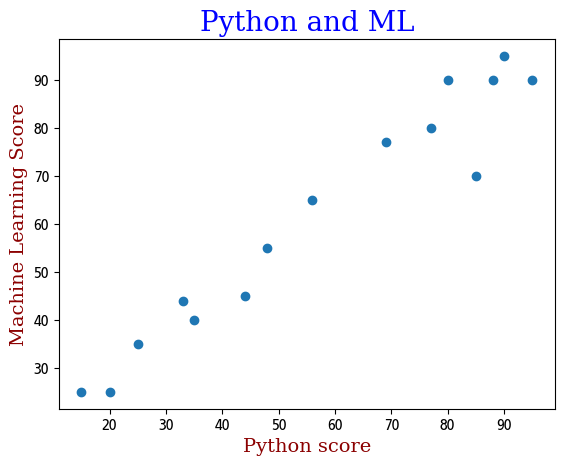

In [77]:
x = np.array([25, 80, 85, 35, 48, 90, 95, 77, 88, 56, 15, 20, 33, 69, 44])
y = np.array([35, 90, 70, 40, 55, 95, 90, 80, 90, 65, 25, 25, 44, 77, 45])
font1 ={'family':'serif', 'color':'blue', 'size':20}
font2 ={'family':'serif', 'color':'darkred', 'size':14} # 글꼴을 딕셔너리 형태로 저장
plt.xlabel("Python score", fontdict=font2) # fontdict 인자에 딕셔너리 타입의 변수를 대입
plt.ylabel("Machine Learning Score", fontdict=font2)
plt.title("Python and ML", fontdict=font1)
plt.scatter(x, y)
plt.show()

### flights 데이터셋

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [80]:
df = flights.pivot(index='month', columns='year', values='passengers')
df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [81]:
df_grouped = flights.groupby('year')['passengers'].sum()
df_grouped

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

In [82]:
df_grouped.head()

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
Name: passengers, dtype: int64

### [실습예제] x-축은 'year', y-축은 'passengers'로 하는 산점도를 그려보자

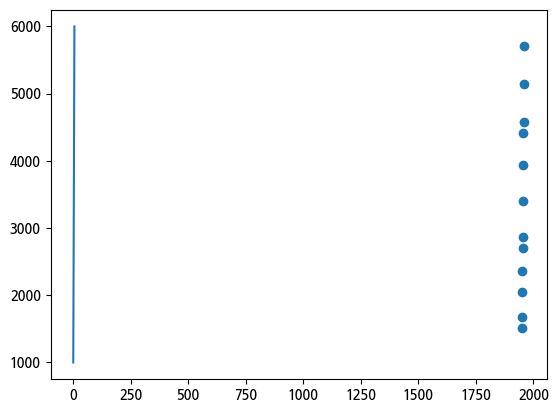

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

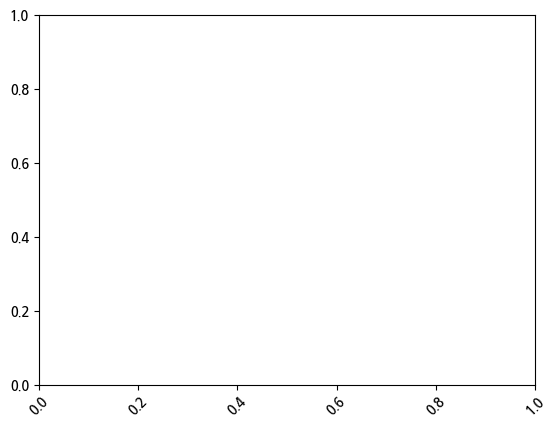

In [84]:
X  = df_grouped.index
Y = df_grouped.values
plt.scatter(X, Y)
plt.plot([1000,2000,3000,4000,5000,6000]) # 그래프를 겹쳐 표시
plt.show()
plt.xticks(rotation = 45 ) # x축 눈금을 회전

### 두 산점도 그래프를 겹쳐 표시

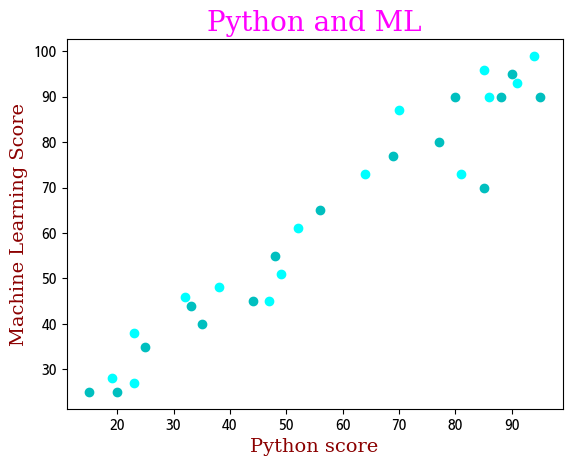

In [86]:
# A_class 성적
x_a = np.array([25, 80, 85, 35, 48, 90, 95, 77, 88, 56, 15, 20, 33, 69, 44])
y_a = np.array([35, 90, 70, 40, 55, 95, 90, 80, 90, 65, 25, 25, 44, 77, 45])
plt.scatter(x_a, y_a,color = 'c') # 산점도 색 지정 : 심홍색
# B_class 성적
x_b =np.array([23, 85, 81, 38, 49, 94, 91, 70, 86, 52, 19, 23, 32, 64, 47])
y_b =np.array([38, 96, 73, 48, 51, 99, 93, 87, 90, 61, 28, 27, 46, 73, 45])
plt.scatter(x_b, y_b, color = 'cyan')
font1 ={'family':'serif', 'color':'magenta', 'size':20}
font2 ={'family':'serif', 'color':'darkred', 'size':14}
plt.xlabel("Python score", fontdict=font2)
plt.ylabel("Machine Learning Score", fontdict=font2)
plt.title("Python and ML", fontdict=font1)
plt.show()

### 색상지도

색상지도(colormap)이란?<br>
• 색상지도(colormap)는 데이터 값을 색으로 매핑한 일종의 ‘색 리스트’다.<br>
• 리스트에 포함된 색은 특정 온도를 가리키며, 온도는 0도에서 100도 사이를 움직인다.<br>
• 즉, 0에서 100 사이의 값으로 이루어진 리스트가 색상지도 역할을 수행한다.<br>
• 여기서, 색상지도에 포함된 수가 가리키는 색은 선택된 색지도에 따라 다르다.<br>

(2) 색상 맵의 종류 이해하기
새로운 색상 맵을 만드는 방법을 배우기 전에, 사용가능한 다양한 색상 맵 유형을 이해
하는 것이 중요하다. 이를 통해 색상 맵을 효과적으로 수정할 수 있다.
<table>
<tr><td>
순차형 색상 맵
(Sequential)
• 이 맵은 밝기가 부드럽게 변하고 때로는 색상도 변한다.
• 연속적인 순서를 가진 데이터를 나타낼 때 사용하기 적합하다.
• 인기 있는 예로 'Hot Colormap' 및 'Rdbu Colormap'이 있다.
</td>
<td>
발산형 색상 맵
(Diverging)
• 두 가지 서로 다른 방향으로 밝기와 (가능하면) 색상이 변화한다.
• 이 맵은 데이터가 중간 값 (예: 0)이 중요한 경우에 유용하다.
    </td>
</tr>
    <td>
질적 색상 맵
(Qualitative)
• 이 맵은 종종 색상이 급격하게 변하기 때문에 범주형 데이터에 사
용하기 적합하다.
        </td>
    <td>
순환형 색상 맵
(Cyclic)
• 이 맵은 각도 (페이즈 각도, 풍향 또는 시간)를 나타내는 데이터에
사용된다.
</td>
</tr>
    
</table>


### 순차형

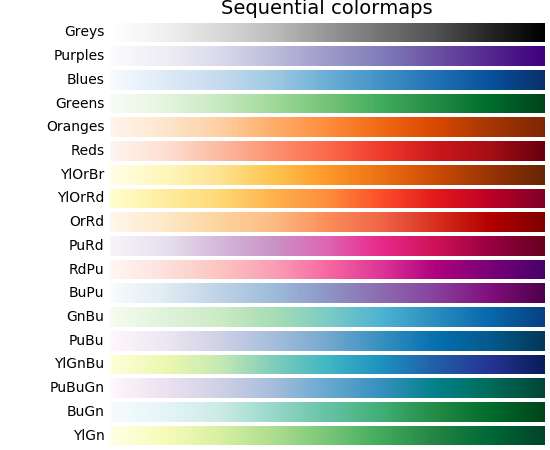

In [91]:
from IPython.display import Image
Image("https://matplotlib.org/2.0.2/_images/colormaps_reference_00.png")
Image("https://matplotlib.org/2.0.2/_images/colormaps_reference_01.png")

### 발산형

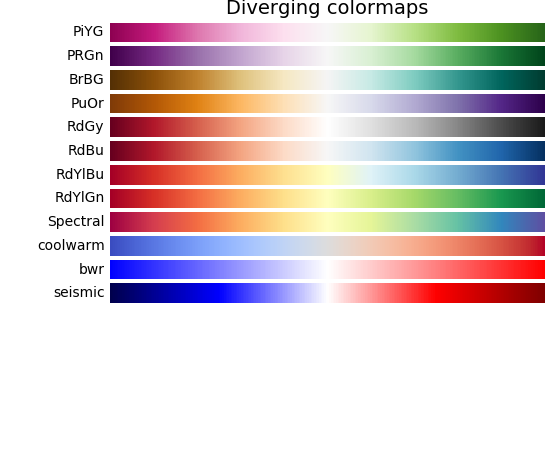

In [93]:
Image("https://matplotlib.org/2.0.2/_images/colormaps_reference_03.png")

### 순환형

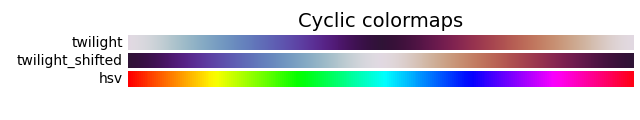

In [95]:
Image("https://matplotlib.org/3.5.0/_images/sphx_glr_colormaps_005.png")

### 질적 색상 맵

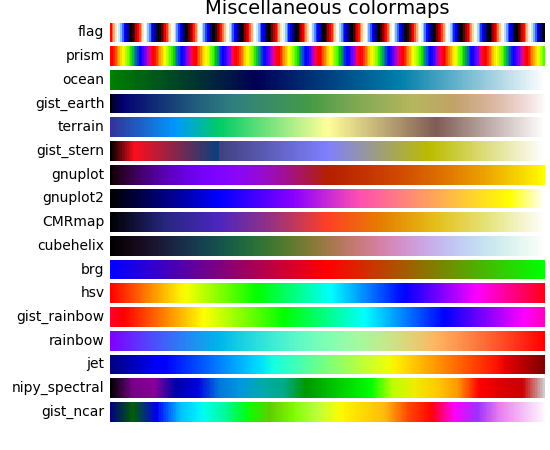

In [97]:
Image("https://matplotlib.org/2.0.2/_images/colormaps_reference_05.png")

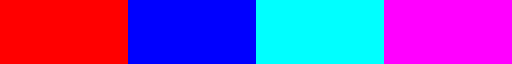

In [98]:
import numpy as np
import matplotlib.pyplot as plt
cmap = plt.cm.colors.ListedColormap(['red', 'blue','cyan','magenta'])
cmap

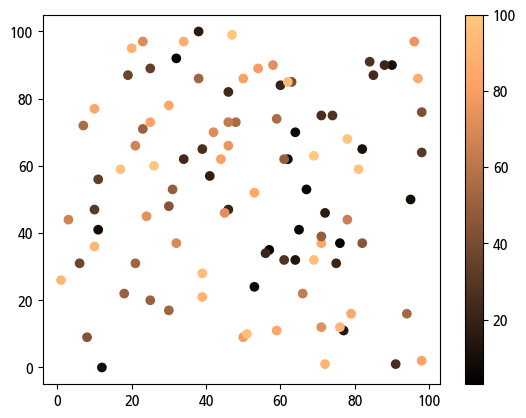

In [99]:
x = np.random.randint(101, size=100) # 1부터 100까지 랜덤한 숫자 100개 추출
y = np.random.randint(101, size=100)
colors = np.random.randint(101, size=100)
plt.scatter(x, y, c=colors, cmap='copper')
plt.colorbar()
plt.show()

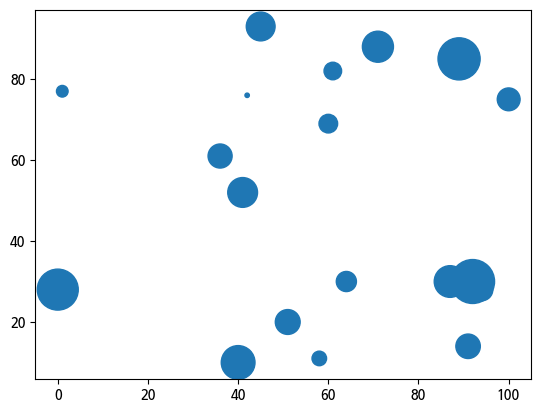

In [100]:
np.random.seed(1000) #
x = np.random.randint(101, size=20)
y = np.random.randint(101, size=20)
sizes = 10 * np.random.randint(101, size=20) # 점의 크기, 0 ~ 100까지의 값 * 10 
plt.scatter(x, y, s=sizes)
plt.show()

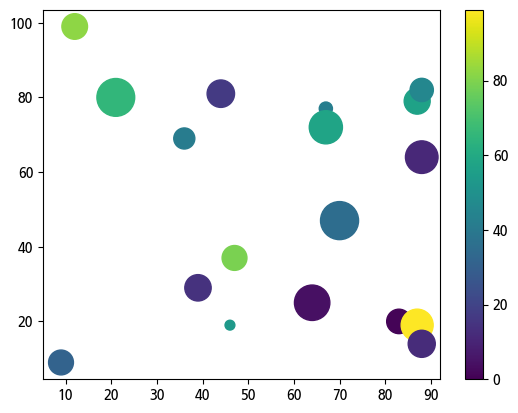

In [101]:
np.random.seed(0) # 시드값이 같으면 같은 난수가 발생한다.
x = np.random.randint(101, size=20)
y = np.random.randint(101, size=20)
sizes = 10 * np.random.randint(101, size=20) # 점의 크기, 0 ~ 100까지의 값 * 10 
colors = np.random.randint(101, size = 20) # 점의 색깔
plt.scatter(x, y, s=sizes, c = colors)
plt.colorbar()
plt.show()

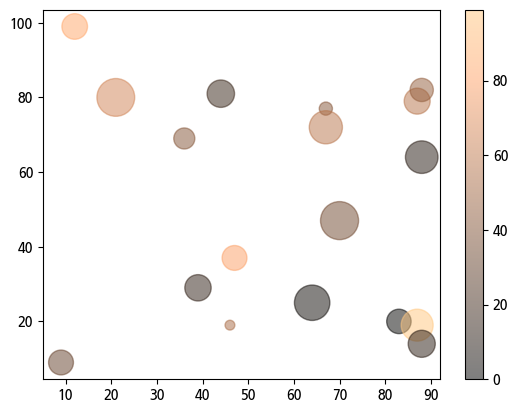

In [102]:
np.random.seed(0) # 시드값이 같으면 같은 난수가 발생한다.
x = np.random.randint(101, size=20)
y = np.random.randint(101, size=20)
sizes = 10 * np.random.randint(101, size=20) # 점의 크기, 0 ~ 100까지의 값 * 10 
colors = np.random.randint(101, size = 20) # 점의 색깔
plt.scatter(x, y, s=sizes, c = colors, cmap='copper', alpha=0.5)
plt.colorbar()
plt.show()

### 다이아몬드 데이터셋

In [104]:
diamonds = sns.load_dataset("diamonds")
diamonds.head( )

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [105]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [106]:
diamonds.isna().count()

carat      53940
cut        53940
color      53940
clarity    53940
depth      53940
table      53940
price      53940
x          53940
y          53940
z          53940
dtype: int64

In [107]:
diamonds.shape

(53940, 10)

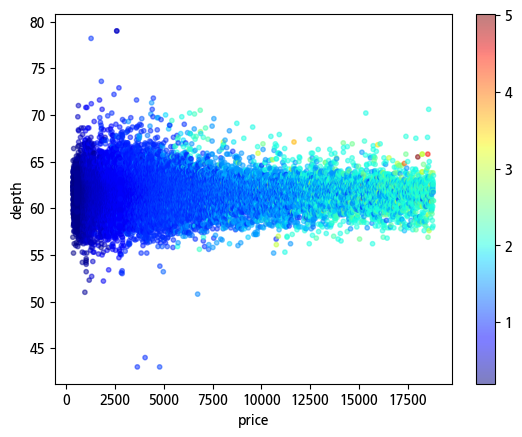

In [108]:
scatter = plt.scatter(diamonds['price'],diamonds['depth'],c=diamonds['carat'], cmap = 'jet', s = 10, alpha=0.5)
plt.colorbar(scatter)
plt.ylabel('depth')
plt.xlabel('price')
plt.show()

### 캐럿이 커질수록(밝아질수록) 가격이 올라간다

### Matplotlib 2

### plt.axhline : 수평선 그리기 (수평선 위치 y =, xmin, xmax)

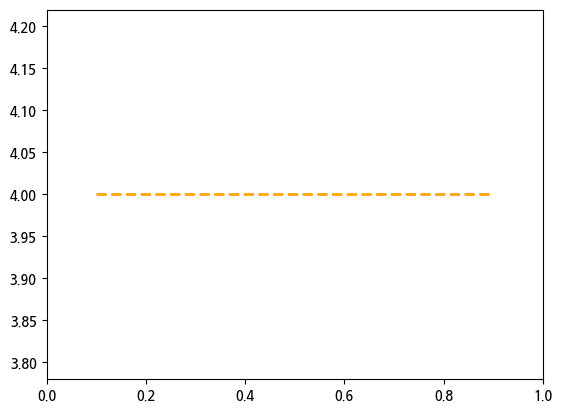

In [112]:
plt.axhline(4.0, 0.1, 0.9, color='Orange', linestyle='--'b, linewidth=2) # 왼쪽으로 10%, 오른쪽으로 10%의 여백
plt.show()

### plt.hline(y좌표, xmin, xmax) : xmin,y부터 xmax,y까지 

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Youth.
  fig.canvas.print_figure(bytes_io, **kw)


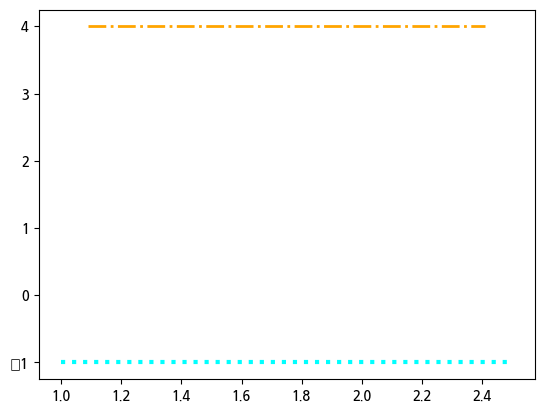

In [114]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(0, 4, 0.5)
plt.axhline(4.0, 0.1, 0.9, color='Orange', linestyle='-.', linewidth=2) # 왼쪽에 여백 10%, 오른쪽에 10%를 갖고 y = 4 값을 그리는 수평선을 그린다.
plt.hlines(-1, 1.0, 2.5, color='cyan', linestyle=':', linewidth=3) # (1.0,-1)과 (2.5,-1) 사이 수평선을 그린다.
plt.show()

### plt.axvline(y = , xmin = , ymin = ), plt.vlines(y = , xmin= , xmax= ) : 수직선 그리기

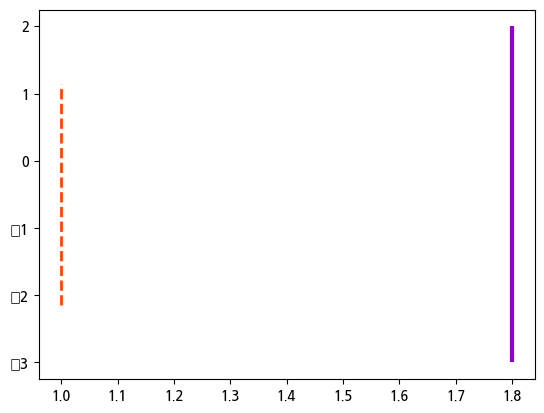

In [116]:
x = np.arange(0, 4, 0.5)
plt.axvline(1.0, 0.2, 0.8, color='OrangeRed', linestyle='--', linewidth=2) # x = 1.0인 수직선을 위쪾 여백 0.2, 아랫쪽 여백 0.8로 해서 그린다
plt.vlines(1.8, -3.0, 2.0, color='DarkViolet', linestyle='solid', linewidth=3) # x = 1.8인 수직선을 y = -3부터 y = 2까지 그린다.
plt.show()

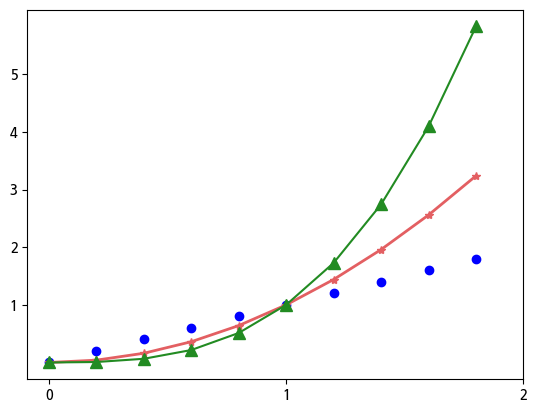

In [117]:
plt.xticks([0, 1, 2]) # x-축 눈금, python list
plt.xticks(np.arange(1, 6)) # y-축 눈금, Nympy array
import numpy as np
x = np.arange(0, 2, 0.2)
plt.plot(x, x, 'bo') # 점 및 색상 지정(b:blue / o: 원모양)
plt.plot(x, x**2, color='#e35f62', marker='*', linewidth=2)
plt.plot(x, x**3, color='forestgreen', marker='^', markersize=9)
plt.xticks([0, 1, 2])
plt.yticks(np.arange(1, 6))
plt.show()

### 눈금 표시하기

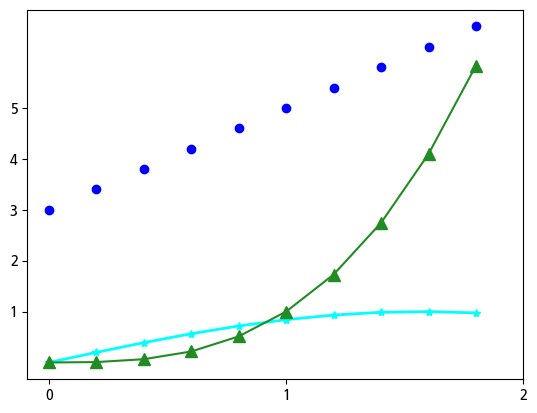

In [119]:
x = np.arange(0,2,0.2)
plt.plot(x,2*x+3,'bo')
plt.plot(x,np.sin(x),color = 'cyan', marker = '*', linewidth = 2)
plt.plot(x,x**3,color='forestgreen',marker='^',markersize = 9)
plt.xticks([0,1,2]) # x축 눈금 지정
plt.yticks(np.arange(1,6)) # y축 눈금 지정
plt.show()

### 막대 그래프

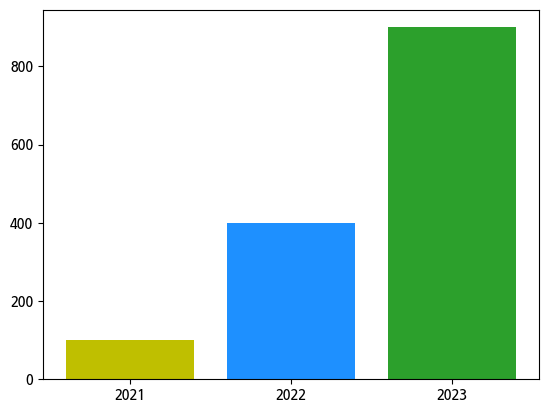

In [121]:
x = np.arange(3)
values = [100, 400, 900]
years = ['2021', '2022', '2023']
colors = ['y', 'dodgerblue', 'C2'] # colors = ['r', 'g', 'b']
plt.bar(x, values, tick_label=years, color=colors) # 다른 색으로 지정
plt.show()

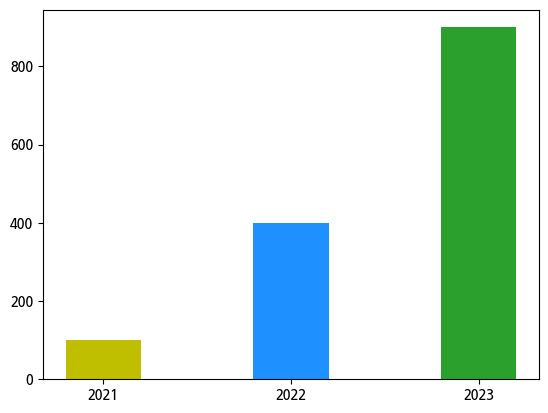

(None,)

In [122]:
x = np.arange(3)
values = [100, 400, 900] 
years = ['2021', '2022', '2023']
colors = ['y', 'dodgerblue', 'C2']
plt.bar(x, values, tick_label=years, color=colors, width=0.4) # width=1.2
plt.show(),

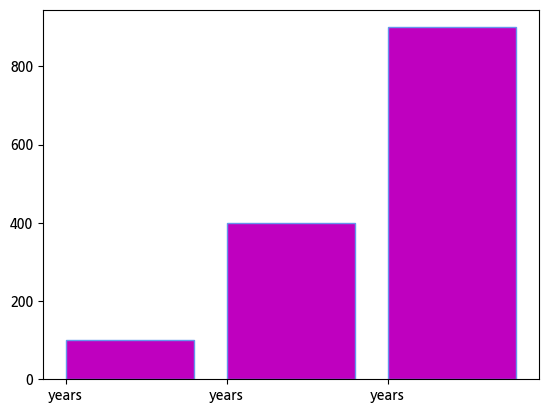

In [123]:
x = np.arange(3)
values =  [100,400,900]
years = [2021,2022,2023]
plt.bar(x, values, tick_label = 'years', color= 'm',align ='edge',edgecolor='CornFlowerBlue')
plt.show()

### Tips 데이터셋

### 요일별로 top의 합계를 나타내는 막대그래프르 그리자

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [128]:
tips_sum = tips.groupby('day',observed = True)['tip'].sum()

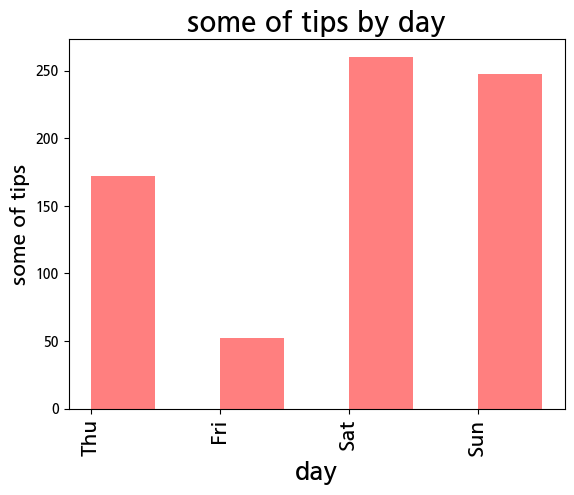

In [129]:
day_week = ['Thu', 'Fri', 'Sat', 'Sun']
index = range(len(day_week))

plt.bar(index, tips_sum,color ='red', alpha=0.5, width=0.5, align = 'edge')
plt.title('some of tips by day',fontsize=20)
plt.xlabel('day',fontsize=18)
plt.ylabel('some of tips',fontsize=15)
plt.xticks(index,day_week,fontsize=15,rotation=90)
plt.show()

### 수평 막대 그래프 그리기

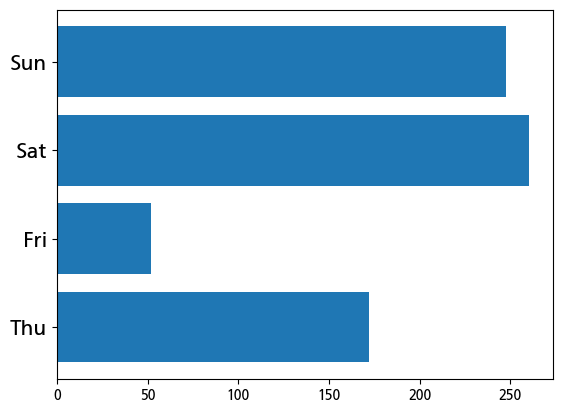

In [131]:
plt.barh(index,tips_sum) # 수평 막대 사용
plt.yticks(index, day_week, fontsize=15, rotation =0)
plt.show()

### [실습예제] 데이터셋 ‘tips’에서 요일(day)별로 tip의 합계를 나타내는 막대그래프를 그리자.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tips = sns.load_dataset('tips')
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [87]:
tips_sum = tips.groupby('day')['tip'].sum() # return series
type(tips_sum)

pandas.core.series.Series

In [89]:
tips_sum = tips.groupby('day')['tip'].sum() # return series
tips_sum

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [91]:
day_week = ['Thur', 'Fri', 'Sat', 'Sun'] # 애초에 day 컬럼의 원소가 4종류밖에 없다.
index = np.arange(len(day_week)) # index 생성

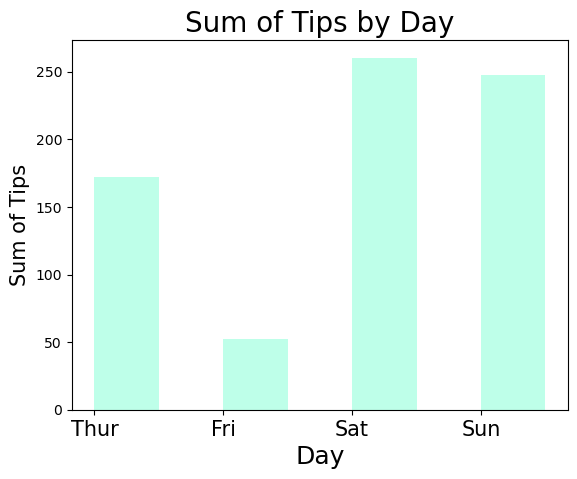

In [93]:
plt.bar(index, tips_sum, color = 'aquamarine',alpha = 0.5, width = 0.5, align = 'edge') # index 대신 day_week로!
# 인덱스, y-data, color, 투명도, 너비, 왼쪽 끝에 맞춰서 정렬
plt.title('Sum of Tips by Day', fontsize=20)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Sum of Tips', fontsize=15)
plt.xticks(index, day_week, fontsize=15) # index는 int형, day_week는 str list(label)
plt.show()

# 5단계: 수평 막대그래프 그리기

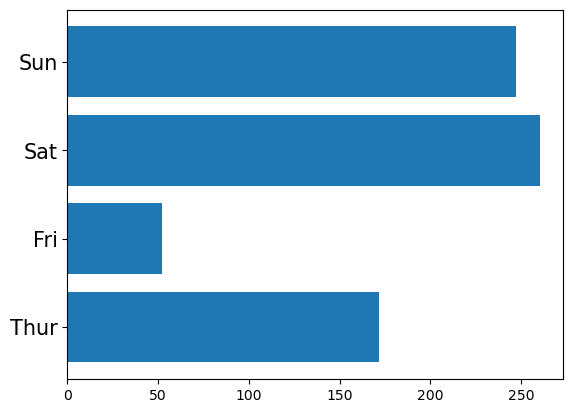

In [100]:
plt.barh(day_week, tips_sum)
plt.yticks(day_week, fontsize=15, rotation=0)
plt.show()

### 여러 개의 막대그래프 그리기

남성과 여성이 준 팁의 합을 요일별로 분석해 막대 그래프로 시각화 해 보자

In [142]:
tips = sns.load_dataset('tips')

In [143]:
display(tips[tips['sex'] == 'Male']) # 남성만 추출
display(tips[tips['sex'] == 'Female']) # 여성만 추출

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2
229,22.12,2.88,Female,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2


In [104]:
tips_sum_male = tips[tips['sex'] == 'Male'].groupby('day')['tip'].sum() # return series or pandas.core.groupby.generic.DataFrameGroupBy
tips_sum_female = tips[tips['sex'] == 'Female'].groupby('day')['tip'].sum()
day_week = ['Thur', 'Fri', 'Sat', 'Sun']
type(tips_sum_male)

pandas.core.series.Series

In [106]:
tips_sum_male = tips[tips['sex'] == 'Male'].groupby('day')
type(tips_sum_male)

pandas.core.groupby.generic.DataFrameGroupBy

In [108]:
tips_sum_male = tips[tips['sex'] == 'Male'].groupby('day')['tip'].sum() # return series or pandas.core.groupby.generic.DataFrameGroupBy
tips_sum_female = tips[tips['sex'] == 'Female'].groupby('day')['tip'].sum()
day_week = ['Thur', 'Fri', 'Sat', 'Sun']

여러 개의 막대그래프 한 번에 그리기

Text(0.5, 0, 'Day')

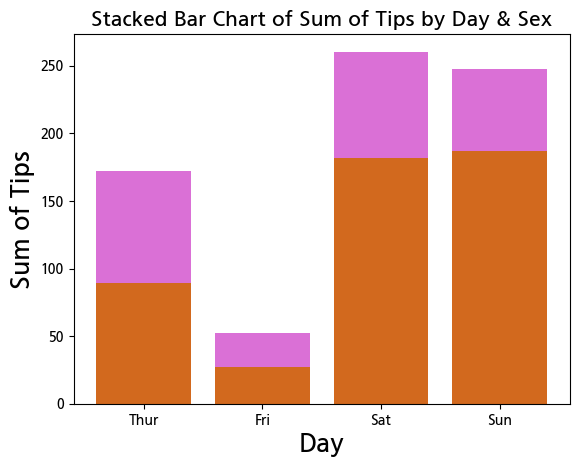

In [148]:
plt.bar(day_week, tips_sum_male, color='Chocolate')
plt.bar(day_week, tips_sum_female, bottom=tips_sum_male, color='Orchid')
plt.title('Stacked Bar Chart of Sum of Tips by Day & Sex', fontsize=15)
plt.ylabel('Sum of Tips', fontsize=18)
plt.xlabel('Day', fontsize=18)

### plt.xticks(index, day_week, fontsize=15) 으로 지정하면 index가 필요하지만,
### plt.bar(day_week, tips_sum_male)로 지정하면 index가 자동 생성된다.

### 옆으로 겹쳐 그리기

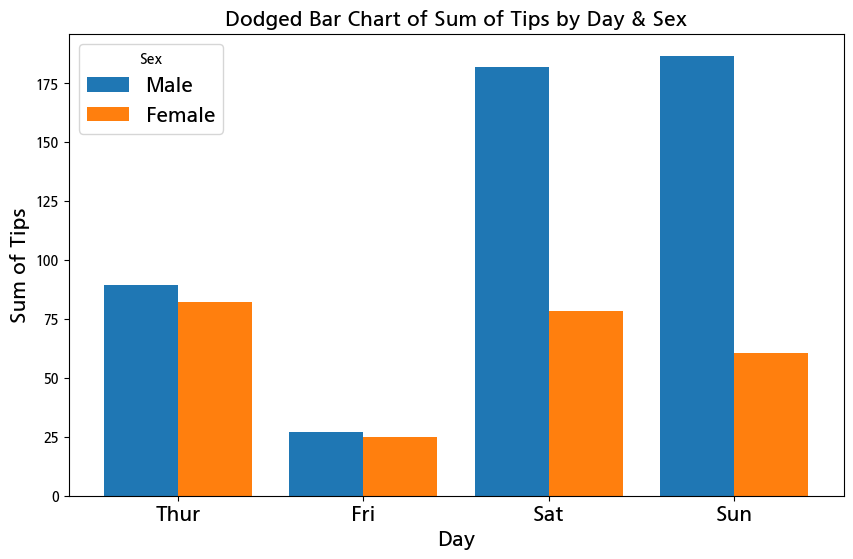

In [152]:
# tips 데이터셋 불러오기
tips = sns.load_dataset('tips')
# 성별에 따른 팁 합계 계산
tips_sum_male = tips[tips['sex'] == 'Male'].groupby('day')['tip'].sum()
tips_sum_female = tips[tips['sex'] == 'Female'].groupby('day')['tip'].sum()
# 요일 순서 설정
day_week = ['Thur', 'Fri', 'Sat', 'Sun']
index = np.arange(len(day_week)) # return int sarray
bar_width = 0.4
# 막대그래프 그리기
plt.figure(figsize=(10, 6)) # 그래프 크기 조정
p1=plt.bar(index, tips_sum_male, width=bar_width, label='Male')

p2=plt.bar(index+bar_width, tips_sum_female, width=bar_width, label='Female') # p1 + bar_width의 좌표에 p2 표현 

# 그래프 제목 및 레이블 설정
plt.title('Dodged Bar Chart of Sum of Tips by Day & Sex', fontsize=15)
plt.ylabel('Sum of Tips', fontsize=15)
plt.xlabel('Day', fontsize=15)
plt.xticks(index + bar_width / 2, day_week, fontsize=15) # 중앙에 맞춤
# index + bar_width의 중간에 x_ticks 작성
plt.legend(title='Sex', fontsize=15)

### seaborn을 사용해 그리기

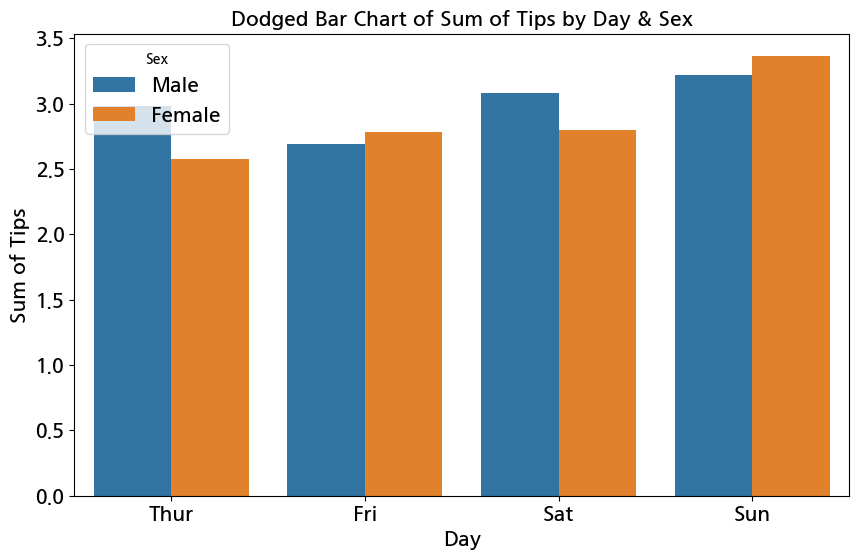

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# tips 데이터셋 불러오기
tips = sns.load_dataset('tips')

# 막대그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
sns.barplot(data=tips, x='day', y='tip', hue='sex', ci=None)  # hue에 'sex' 설정으로 성별 나란히 표시, ci=None으로 오차막대 제거

# 그래프 제목 및 레이블 설정
plt.title('Dodged Bar Chart of Sum of Tips by Day & Sex', fontsize=15)
plt.ylabel('Sum of Tips', fontsize=15)
plt.xlabel('Day', fontsize=15)
plt.xticks(fontsize=15)  # x축 눈금 폰트 크기 설정
plt.yticks(fontsize=15)  # y축 눈금 폰트 크기 설정
plt.legend(title='Sex', fontsize=15)

plt.show()


### 히스토그램 : 도수분포표를 그래프로 나타낸 것

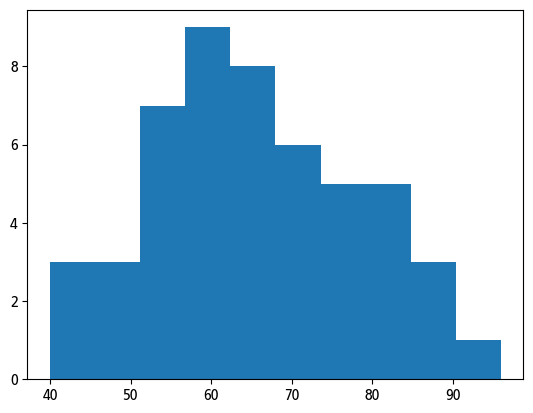

In [156]:
score = [63, 73, 52, 76, 67, 68, 70, 64, 54, 40, 80, 65, 49, 83, 65, 51, 54,
79, 78, 88, 55, 58, 57, 43, 96, 85, 55, 66, 65, 78, 62, 82, 60, 52,
45, 61, 71, 72, 81, 83, 62, 58, 72, 86, 50, 65, 78, 59, 61, 56]
plt.hist(score) # 인자로 리스트를 받아 생성
plt.show()

(array([1., 2., 0., 3., 2., 5., 4., 5., 6., 2., 2., 4., 1., 4., 2., 3., 2.,
        1., 0., 1.]),
 array([40. , 42.8, 45.6, 48.4, 51.2, 54. , 56.8, 59.6, 62.4, 65.2, 68. ,
        70.8, 73.6, 76.4, 79.2, 82. , 84.8, 87.6, 90.4, 93.2, 96. ]),
 <BarContainer object of 20 artists>)

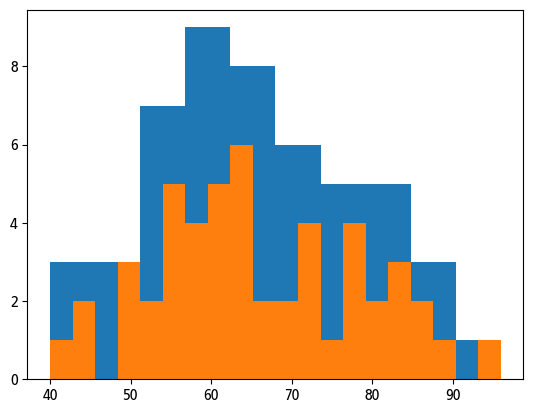

In [157]:
plt.hist(score, bins=10, label='bins=20') # bins : 구간의 개수ㅡ default = 10
plt.hist(score, bins=20, label='bins=20') 

### 누적 히스토그램 그리기 : cumulative 파라미터를 True로 지정하면 누적 히스토그램을 나타낸다.

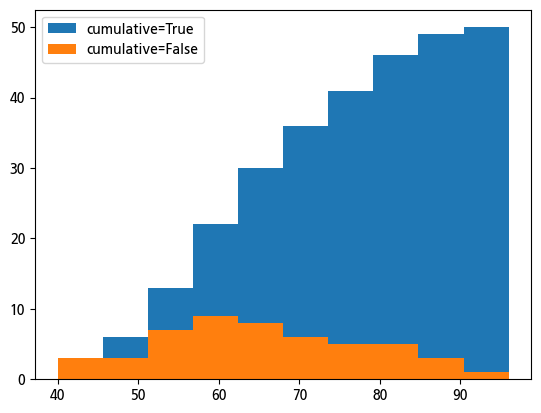

In [159]:
score = [63, 73, 52, 76, 67, 68, 70, 64, 54, 40, 80, 65, 49, 83, 65, 51, 54,
79, 78, 88, 55, 58, 57, 43, 96, 85, 55, 66, 65, 78, 62, 82, 60, 52,
45, 61, 71, 72, 81, 83, 62, 58, 72, 86, 50, 65, 78, 59, 61, 56]
plt.hist(score, cumulative=True, label='cumulative=True')
plt.hist(score, cumulative=False, label='cumulative=False') # 히스토그램
plt.legend(loc='upper left')

### 히스토그램 형태 지정 : histtype : {'bar', 'barstacked', 'step', 'stepfilled'} , default : bar

<Figure size 640x480 with 0 Axes>

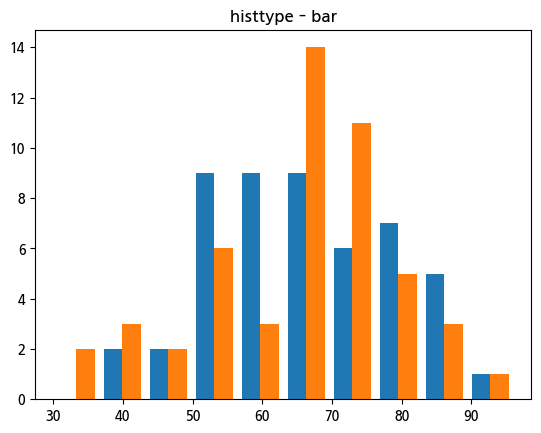

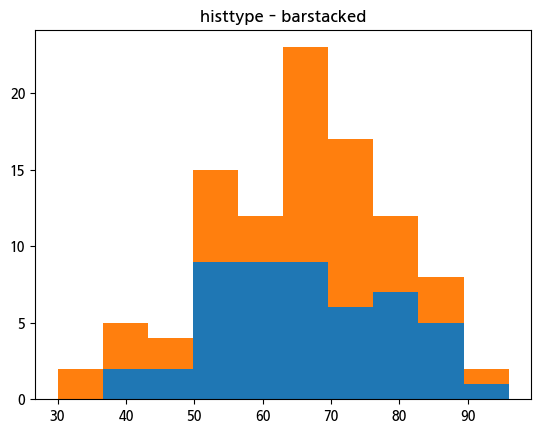

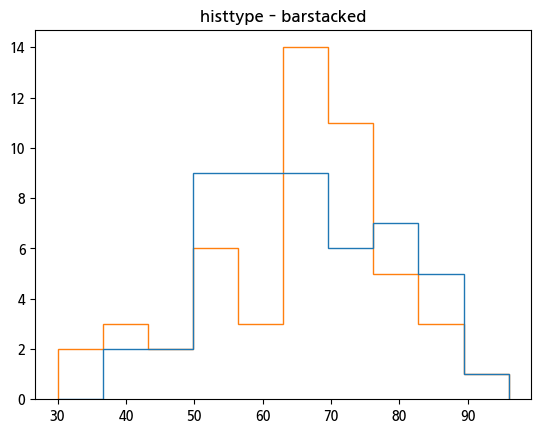

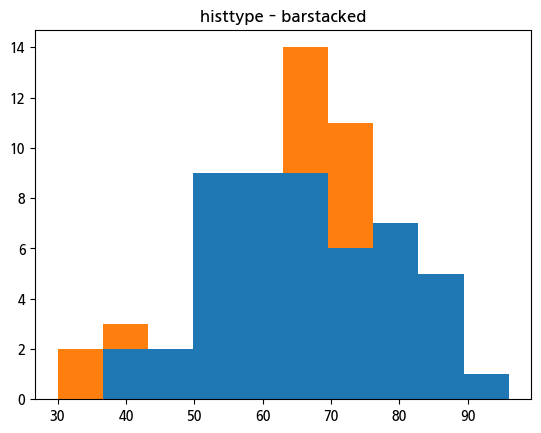

<Figure size 640x480 with 0 Axes>

In [161]:
score1 = [63, 73, 52, 76, 67, 68, 70, 64, 54, 40, 80, 65, 49, 83, 65, 51, 54,
79, 78, 88, 55, 58, 57, 43, 96, 85, 55, 66, 65, 78, 62, 82, 60, 52,
45, 61, 71, 72, 81, 83, 62, 58, 72, 86, 50, 65, 78, 59, 61, 56]
score2 = [65, 69, 55, 76, 68, 45, 64, 66, 67, 70, 83, 71, 70, 74, 59, 60, 77,
69, 80, 50, 60, 54, 85, 42, 90, 66, 42, 67, 66, 78, 72, 30, 79, 75,
75, 35, 51, 65, 47, 56, 85, 63, 78, 53, 75, 75, 68, 70, 38, 64]

plt.hist((score1, score2), histtype='bar') # default : 바 형태
plt.title('histtype - bar')
plt.figure() 

plt.hist((score1, score2), histtype='barstacked')
plt.title('histtype - barstacked')
plt.figure()
plt.hist((score1, score2), histtype='step')
plt.title('histtype - barstacked')
plt.figure()
plt.hist((score1, score2), histtype='stepfilled')
plt.title('histtype - barstacked')
plt.figure()


### plt.figure()는 그래프를 담은 캔버스를 생성한다. 없으면 모든 그래프가 합쳐져 표현된다.

Text(0.5, 1.0, 'histtype - barstacked')

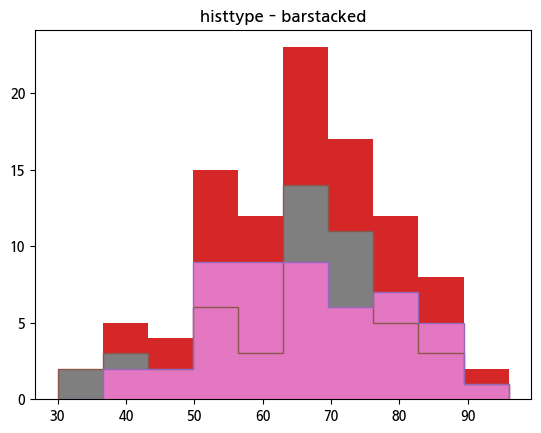

In [163]:
score1 = [63, 73, 52, 76, 67, 68, 70, 64, 54, 40, 80, 65, 49, 83, 65, 51, 54,
79, 78, 88, 55, 58, 57, 43, 96, 85, 55, 66, 65, 78, 62, 82, 60, 52,
45, 61, 71, 72, 81, 83, 62, 58, 72, 86, 50, 65, 78, 59, 61, 56]
score2 = [65, 69, 55, 76, 68, 45, 64, 66, 67, 70, 83, 71, 70, 74, 59, 60, 77,
69, 80, 50, 60, 54, 85, 42, 90, 66, 42, 67, 66, 78, 72, 30, 79, 75,
75, 35, 51, 65, 47, 56, 85, 63, 78, 53, 75, 75, 68, 70, 38, 64]

plt.hist((score1, score2), histtype='bar') # default : 바 형태
plt.title('histtype - bar')


plt.hist((score1, score2), histtype='barstacked')
plt.title('histtype - barstacked')


plt.hist((score1, score2), histtype='step')
plt.title('histtype - barstacked')


plt.hist((score1, score2), histtype='stepfilled')
plt.title('histtype - barstacked')

### 1. plt.figure() 함수는 꼭 사용해야 할까?  
• plt.figure() 함수는 Matplotlib에서 그림(figure) 객체를 생성하기 위해 사용한다.  
• 그러나 모든 그래프를 그릴 때마다 plt.figure() 함수를 명시적으로 호출할 필요는 없다.  
• Matplotlib은 기본적으로 plt.figure() 함수를 자동으로 호출하여 기본 그림(figure) 객
체를 생성하기 때문이다.  
• 하지만 다음과 같은 경우에는 반드시 figure()를 사용해야 한다.  
▣ 여러 개의 그림을 동시에 그리고 싶을 때  
plt.figure() 함수를 호출하여 새로운 그림 객체를 생성하고, 이를 통해 서로 다른 그  
림을 그릴 수 있다.  
▣ 그림의 크기, 해상도, 배경색 등의 속성을 직접 지정하고 싶을 때  
plt.figure() 함수의 매개변수를 사용하여 그림의 속성을 조정할 수 있다. 이를 통해  
원하는 그림의 크기, 해상도, 배경색 등을 설정할 수 있다.<br><br>
### 2. figure() 함수의 인자들  
• plt.figure() 함수를 호출하면 새로운 그림(figure) 객체가 생성되고, 이 객체를 통해 그  
림의 여러 속성과 서브플롯을 조작할 수 있다.    
import matplotlib.pyplot as plt  
plt.figure(num, figsize, dpi, facecolor, edgecolor, frameon)  
• num: 그림(figure)의 번호. 이 매개변수를 사용하여 이미 생성된 그림의 번호를 지정  
하거나, 번호를 지정하지 않으면 자동으로 그림 번호가 부여된다.  
• figsize: 그림의 크기. (가로 크기, 세로 크기) 형태의 튜플로 값을 지정하며, 단위는  
인치이다. 예를 들어, figsize=(8, 6)은 가로 8인치, 세로 6인치 크기의 그림을 생성한  
다.  
• dpi: 그림의 해상도. 인치당 도트 수로 해상도를 설정하며, 기본값은 100이다.  
• facecolor: 그림의 배경색. 색상을 지정하는 문자열이나 RGB 튜플을 사용할 수 있다.  
• edgecolor: 그림의 테두리 색. 색상을 지정하는 문자열이나 RGB 튜플을 사용할 수 있다.  
• frameon: 그림의 테두리를 그릴지 여부를 결정한다. 기본값은 True로 테두리를 그리며, False로 설정하면 테두리를 그리지 않는다.  

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15544\3345454811.py:17: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(s) Youth.
  plt.tight_layout() # 또는 fig.tight_layout(), axes 사이 간격을 적당히 띄워준다.
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(s) Youth.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(s) Youth.
  fig.canvas.print_figure(bytes_io, **kw)


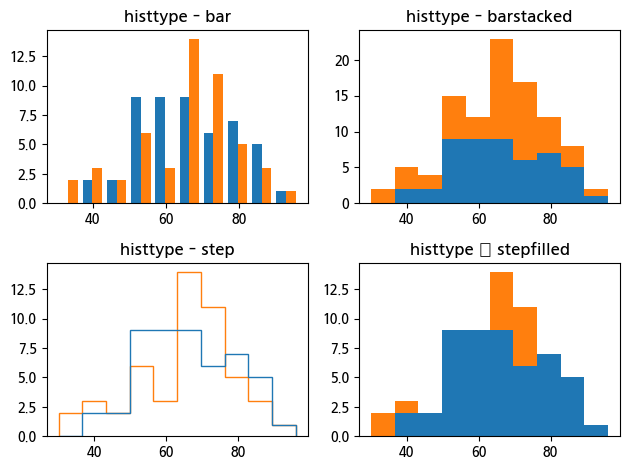

In [165]:
fig, ax = plt.subplots(2, 2) # 2행 2열의 그림을 그리는 공간을 만든다.
score1 = [63, 73, 52, 76, 67, 68, 70, 64, 54, 40, 80, 65, 49, 83, 65, 51, 54,
79, 78, 88, 55, 58, 57, 43, 96, 85, 55, 66, 65, 78, 62, 82, 60, 52,
45, 61, 71, 72, 81, 83, 62, 58, 72, 86, 50, 65, 78, 59, 61, 56]
score2 = [65, 69, 55, 76, 68, 45, 64, 66, 67, 70, 83, 71, 70, 74, 59, 60, 77,
69, 80, 50, 60, 54, 85, 42, 90, 66, 42, 67, 66, 78, 72, 30, 79, 75,
75, 35, 51, 65, 47, 56, 85, 63, 78, 53, 75, 75, 68, 70, 38, 64]
plt.title('overall title')
ax[0, 0].hist((score1, score2), histtype='bar')
ax[0, 0].set_title('histtype - bar')
ax[0, 1].hist((score1, score2), histtype='barstacked')
ax[0, 1].set_title('histtype - barstacked')
ax[1, 0].hist((score1, score2), histtype='step')
ax[1, 0].set_title('histtype - step')
ax[1, 1].hist((score1, score2), histtype='stepfilled')
ax[1, 1].set_title('histtype – stepfilled')
plt.tight_layout() # 또는 fig.tight_layout(), axes 사이 간격을 적당히 띄워준다.

### 유형 간의 차이는 plt.title이 아니라 set_title, plt.xlabel이 아니라 plt.set_xlabel를 사용해야 한다. 즉 set_title() 메소드를 사용하여 각각의 서브플롯에 제목을 추가할 수 있다.  
plt.title = ('overall title')에서 plt.title을 호출하는 대신 직접 plt.suptitle을 사용해야 합니다.   
plt.suptitle은 전체 subplot 배열의 제목을 설정해주는 역할을 합니다.  

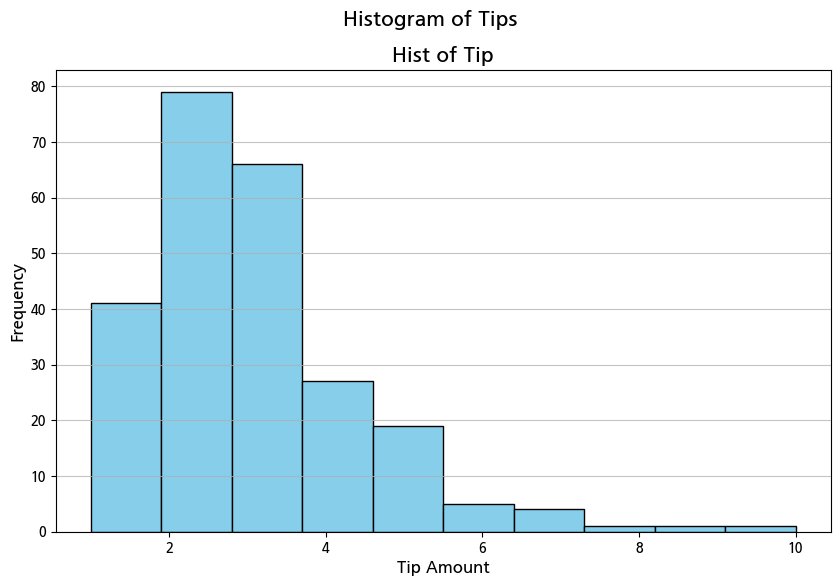

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
# tips 데이터셋 불러오기
tips = sns.load_dataset('tips')
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(tips['tip'], bins=10, color='skyblue', edgecolor='black')
plt.suptitle('Histogram of Tips', fontsize=15) 
plt.title('Hist of Tip', fontsize=15) 
plt.xlabel('Tip Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

### [실습예제] 히스토그램은 연속형 데이터의 분포를 시각화하는 데 유용하다. 여기서는 데이터셋 'tips'의 열 팁(tip)의 분포를 히스토그램으로 시각화하자.

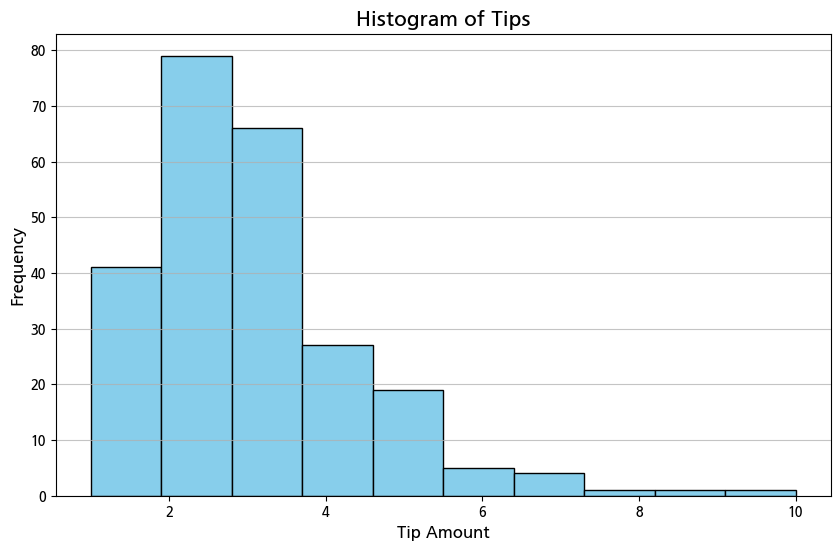

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
# tips 데이터셋 불러오기
tips = sns.load_dataset('tips')
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(tips['tip'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Tips', fontsize=15)
plt.xlabel('Tip Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

### mpg dataset : 1 gallon당 자동차 주요 모델별 연비를 나타낸 데이터

### [실습과제] Seaborn에 내장된 mpg 데이터 셋의 열 mpg(연비, mile per gallon)를 선택하여 히스토그램으로 작성하시오. 이 데이터는 미국 EPA에서 1970년부터 1982년까지 출시된 여러 가지 자동차 모델에 대한 연비, 실린더, 배기량 등의 데이터를 포함하는 데이터셋이다.

<Figure size 1000x600 with 0 Axes>

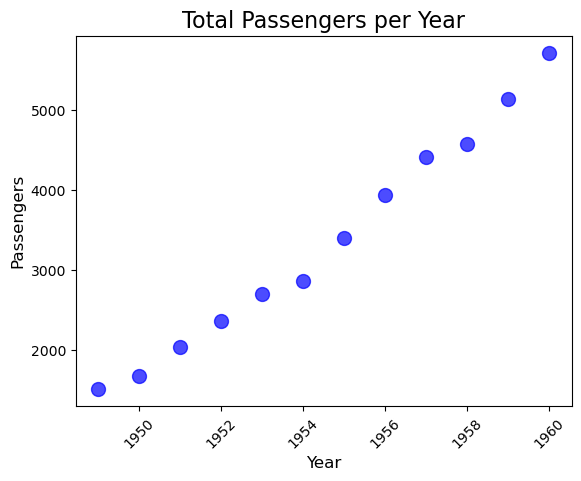

<Figure size 1000x600 with 0 Axes>

In [29]:
import seaborn as sns
flights = sns.load_dataset('flights')
df_grouped = flights.groupby('year')['passengers'].sum()
df_grouped
# 산점도 그리기
plt.scatter(df_grouped.index, df_grouped.values, s=100, c='blue', alpha=0.7)
plt.title('Total Passengers per Year', fontsize=16)
plt.xlabel('Year', fontsize=12) # 그래프 제목 및 축 레이블 추가
plt.ylabel('Passengers', fontsize=12)
plt.xticks(rotation=45) # x축 눈금 표시를 회전
plt.figure(figsize=(10, 6)) # 그래프 보여주기

In [172]:
import seaborn as sns
mpg = sns.load_dataset('mpg')

In [173]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Text(0, 0.5, 'Frequency')

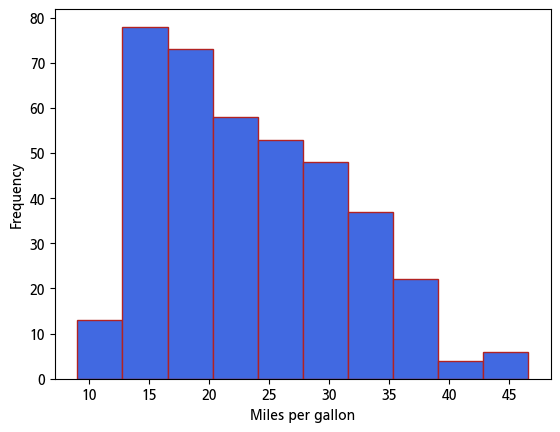

In [174]:
mpg = mpg.dropna()
plt.hist(mpg['mpg'],bins = 10, color = 'royalblue',edgecolor = 'firebrick')
plt.xlabel('Miles per gallon')
plt.ylabel('Frequency')

## 파이 차트 : 원형 그래프

### • 파이 차트(Pie chart, 원 그래프)는 범주형 자료를 구성 비율에 따라 원형으로 표현한 그래프이다.
### • 부채꼴의 중심각을 구성 비율에 비례하도록 표현한다.

([<matplotlib.patches.Wedge at 0x1f0f2fca720>,
 [Text(0.5299290306818474, 0.9639373540021144, 'Apple'),
  Text(-1.1, 1.3471114790620887e-16, 'Banana'),
  Text(-0.06906960848527934, -1.0978293989430645, 'Melon'),
  Text(0.928760704807937, -0.5894094953465411, 'Grapes')],
 [Text(0.28905219855373493, 0.5257840112738805, '34.0%'),
  Text(-0.6, 7.347880794884119e-17, '32.0%'),
  Text(-0.037674331901061446, -0.598816035787126, '16.0%'),
  Text(0.5065967480770565, -0.3214960883708406, '18.0%')])

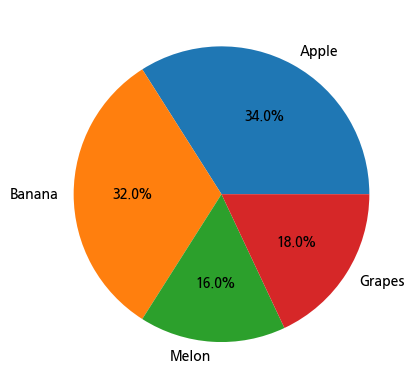

In [178]:
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes'] # C.C.W 방향으로 라벨링한다.
plt.pie(ratio, labels=labels, autopct='%.1f%%') # 예를 들어, %.1f%%는 백분율을 소수점 한 자리로 표시하고 뒤에 % 기호를 붙입니다.

각 영역의 비율과 이름을 ratio와 labels로 지정한다.  
• 기본적으로 ratio 리스트의 값에 대해 $x/sum(x)$  x 360 의 각도가 정해진다.  
• 하지만 리스트의 값들이 모두 1보다 작다면 각 값이 그대로 비율이 되며, 1-sum(x)에
해당하는 부분은 빈 영역이 된다.  
• autopct는 부채꼴 안에 표시될 숫자의 형식을 지정한다. 소수점 첫째 자리까지 표시하
도록 설정한 코드이다.  

### 시작 각도 지정 : startangle 인자 사용 (default : 0)

### 방향 지정 : counterclock 인자 사용 (default : true)

([<matplotlib.patches.Wedge at 0x1f0f31887d0>,
 [Text(-1.0413141901100615, -0.3544922530541775, 'Apple'),
  Text(0.19101299543362346, 1.0832885283134288, 'Banana'),
  Text(1.0931447152094993, -0.12261578858182408, 'Melon'),
  Text(0.4191774368377346, -1.017000627554451, 'Grapes')],
 [Text(-0.5679895582418516, -0.19335941075682406, '34.0%'),
  Text(0.10418890660015824, 0.5908846518073247, '32.0%'),
  Text(0.5962607537506359, -0.06688133922644948, '16.0%'),
  Text(0.22864223827512792, -0.5547276150297005, '18.0%')])

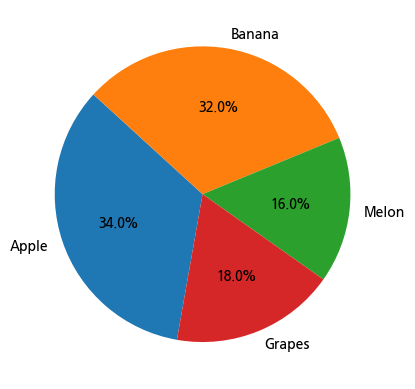

In [182]:
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
plt.pie(ratio, labels=labels, autopct='%.1f%%',
startangle=260, counterclock=False) # 

### 중심에서 이탈시켜 강조하기 : explode 인자

In [184]:
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
explode = [0, 0.1, 0, 1]

([<matplotlib.patches.Wedge at 0x1f0f3202510>,
 [Text(-1.0413141901100615, -0.3544922530541775, 'Apple'),
  Text(0.2083778132003165, 1.1817693036146497, 'Banana'),
  Text(1.0931447152094993, -0.12261578858182408, 'Melon'),
  Text(0.8002478339629479, -1.941546652603952, 'Grapes')],
 [Text(-0.5679895582418516, -0.19335941075682406, '34.0%'),
  Text(0.12155372436685129, 0.6893654271085455, '32.0%'),
  Text(0.5962607537506359, -0.06688133922644948, '16.0%'),
  Text(0.6097126354003412, -1.4792736400792013, '18.0%')])

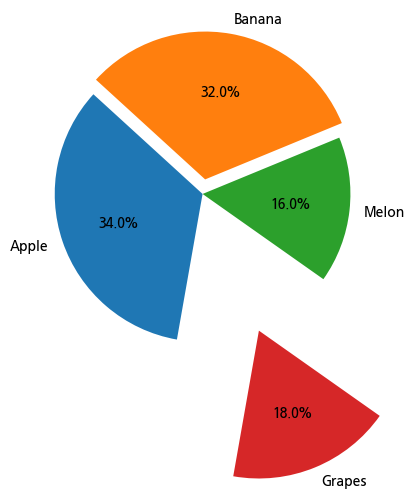

In [185]:
plt.pie(ratio, labels=labels, autopct='%.1f%%',
startangle=260, counterclock=False, explode=explode) # label의 순서대로 explode 작적용

### 그림자 나타내기 : shadow = true (default : false)

([<matplotlib.patches.Wedge at 0x1f0f3fd5520>,
 [Text(-1.0413141901100615, -0.3544922530541775, 'Apple'),
  Text(0.2083778132003165, 1.1817693036146497, 'Banana'),
  Text(1.0931447152094993, -0.12261578858182408, 'Melon'),
  Text(0.45728447655025595, -1.1094552300594012, 'Grapes')],
 [Text(-0.5679895582418516, -0.19335941075682406, '34.0%'),
  Text(0.12155372436685129, 0.6893654271085455, '32.0%'),
  Text(0.5962607537506359, -0.06688133922644948, '16.0%'),
  Text(0.26674927798764925, -0.6471822175346506, '18.0%')])

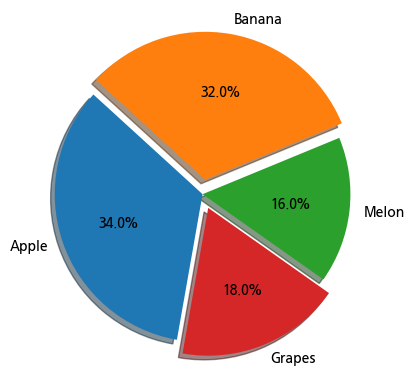

In [187]:
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
explode = [0, 0.10, 0, 0.10]
plt.pie(ratio, labels=labels, autopct='%.1f%%',
startangle=260, counterclock=False, explode=explode, shadow=True)

### 색상 지정하기 : colors 인자 사용

([<matplotlib.patches.Wedge at 0x1f0f30c9a00>,
 [Text(-1.0413141901100615, -0.3544922530541775, 'Apple'),
  Text(0.2083778132003165, 1.1817693036146497, 'Banana'),
  Text(1.0931447152094993, -0.12261578858182408, 'Melon'),
  Text(0.45728447655025595, -1.1094552300594012, 'Grapes')],
 [Text(-0.5679895582418516, -0.19335941075682406, '34.0%'),
  Text(0.12155372436685129, 0.6893654271085455, '32.0%'),
  Text(0.5962607537506359, -0.06688133922644948, '16.0%'),
  Text(0.26674927798764925, -0.6471822175346506, '18.0%')])

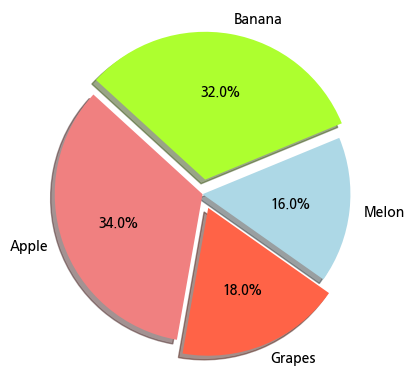

In [189]:
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
explode = [0, 0.10, 0, 0.10]
colors =['LightCoral', 'GreenYellow', 'LightBlue', 'Tomato']
# colors =['#ff9999','#ffc000','#8fd9b6','#d395d0']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260,
counterclock=False, explode=explode, shadow=True, colors=colors)

### 도넛형으로 생성 : wedgeprops 인자 사용

([<matplotlib.patches.Wedge at 0x1f0f2d3f3b0>,
 [Text(-1.0413141901100615, -0.3544922530541775, 'Apple'),
  Text(0.19101299543362346, 1.0832885283134288, 'Banana'),
  Text(1.0931447152094993, -0.12261578858182408, 'Melon'),
  Text(0.4191774368377346, -1.017000627554451, 'Grapes')],
 [Text(-0.5679895582418516, -0.19335941075682406, '34.0%'),
  Text(0.10418890660015824, 0.5908846518073247, '32.0%'),
  Text(0.5962607537506359, -0.06688133922644948, '16.0%'),
  Text(0.22864223827512792, -0.5547276150297005, '18.0%')])

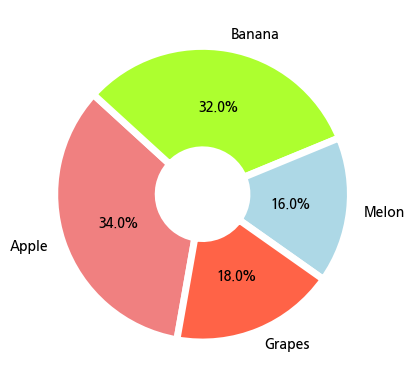

In [191]:
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
explode = [0, 0.10, 0, 0.10]
colors =['LightCoral', 'GreenYellow', 'LightBlue', 'Tomato']
wedgeprops={'width':0.7, 'edgecolor':'w', 'linewidth':5} # width = 0.7 -> 각 조각은 반지름의 0.7만큼을 차지한다
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260,
counterclock=False, colors=colors, wedgeprops=wedgeprops) 


wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}는 matplotlib의 파이 차트에서 조각(wedge)의 속성을 설정하는 데 사용되는 매개변수입니다. 여기서 width 인자는 다음과 같은 역할을 합니다:

width 인자
설명: width 인자는 파이 차트의 조각의 두께를 설정하는 데 사용됩니다. 기본값은 1.0이며, 이는 기본적으로 조각이 전체 원의 경계까지 확장됨을 의미합니다.
효과: width를 0.7로 설정하면, 각 조각이 원의 중심에서부터 원주까지의 거리의 70%만큼 차지하게 되어, 조각이 내부로 줄어들게 됩니다. 결과적으로 파이 차트는 도넛형(doughnut chart) 모양이 되며, 중간 부분이 비어 있는 형태를 가지게 됩니다.

([<matplotlib.patches.Wedge at 0x1f0f2d9dcd0>,
 [Text(-1.0413141901100615, -0.3544922530541775, 'Apple'),
  Text(0.19101299543362346, 1.0832885283134288, 'Banana'),
  Text(1.0931447152094993, -0.12261578858182408, 'Melon'),
  Text(0.4191774368377346, -1.017000627554451, 'Grapes')],
 [Text(-0.5679895582418516, -0.19335941075682406, '34.0%'),
  Text(0.10418890660015824, 0.5908846518073247, '32.0%'),
  Text(0.5962607537506359, -0.06688133922644948, '16.0%'),
  Text(0.22864223827512792, -0.5547276150297005, '18.0%')])

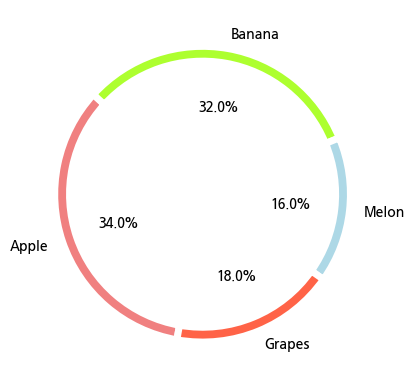

In [193]:
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
explode = [0, 0.10, 0, 0.10]
colors =['LightCoral', 'GreenYellow', 'LightBlue', 'Tomato']
wedgeprops={'width':0.1, 'edgecolor':'w', 'linewidth':5} # width = 반지름의 0.1배만큼 조각 생성
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260,
counterclock=False, colors=colors, wedgeprops=wedgeprops) 

### [실습예제] 파이 차트는 범주형 데이터의 비율을 시각화하는 데 적합하다. 여기서는 데이터셋 'tips'의 성별(sex)에 따른 팁의 총합을 파이 차트로 시각화해 보자.

In [195]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [196]:
tips_sum_by_sex = tips.groupby('sex')['tip'].sum()

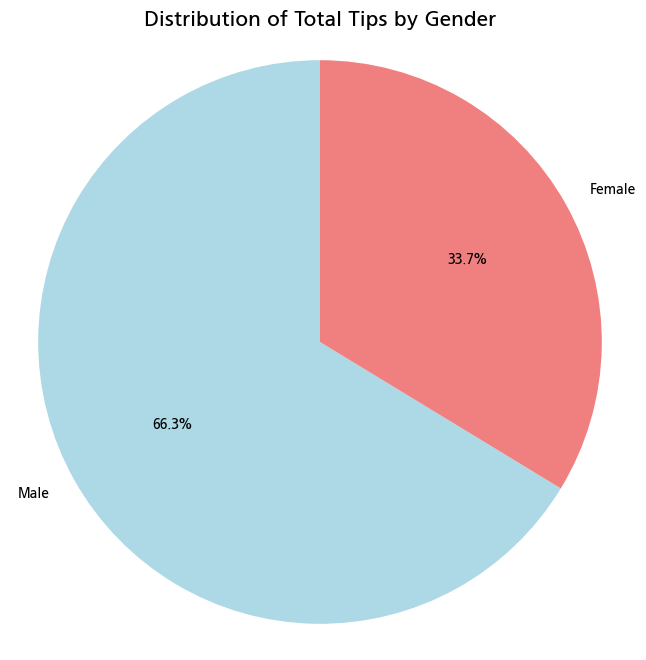

In [197]:
plt.figure(figsize=(8, 8))
plt.pie(tips_sum_by_sex, labels=tips_sum_by_sex.index, autopct='%.1f%%',
startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Total Tips by Gender', fontsize=15)
plt.axis('equal') # 파이 차트를 원형으로 유지
plt.show()

### [실습과제] datasets이라는 패키지의 내장된 mpg 데이터셋의 실린더 수(cylinders)를 선택하여 파이 차트로 작성하시오.

In [199]:
mpgs = sns.load_dataset('mpg')
mpgs.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


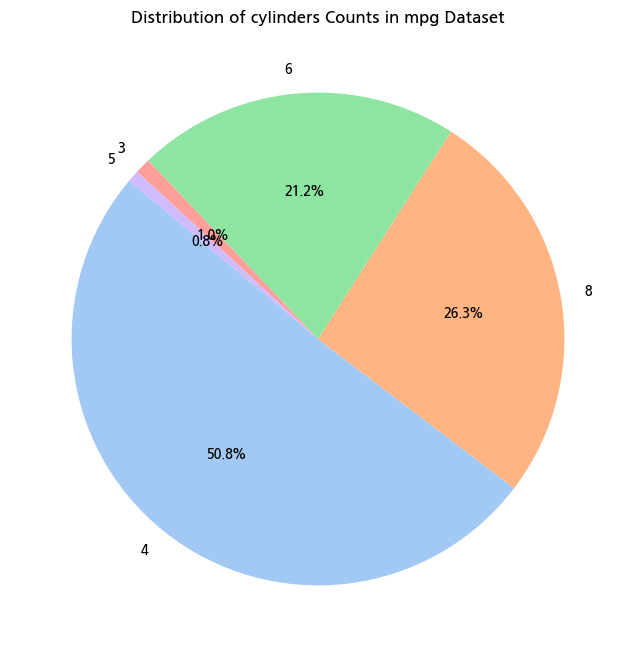

In [200]:
# mpg 데이터셋 불러오기
mpg = sns.load_dataset('mpg').dropna() # NaN 값 제거
# 실린더 수 데이터 추출
cylinders_counts = mpg['cylinders'].value_counts()

# 파이 차트 작성
plt.figure(figsize=(8, 8))
plt.pie(cylinders_counts, labels=cylinders_counts.index, autopct='%.1f%%', # .1 형태로 반올림해서 21.2%와 같은 형식으로 표시
startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of cylinders Counts in mpg Dataset')
plt.show()

### 히트맵

### 히트맵(heatmap)은 다양한 값을 갖는 숫자 데이터를 열분포 형태와 같이 색상을 이용해서 시각화한 것이다.

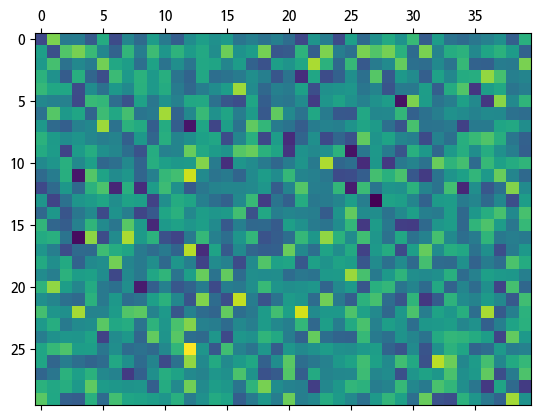

In [203]:
import numpy as np
import matplotlib.pyplot as plt
arr = np.random.standard_normal((30,40)) # 정규분포 값을 갖는 30 ~ 40의 데이터셋 생성
plt.matshow(arr) # arr은 2차원 array 또는 리스트

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Youth.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Youth.
  fig.canvas.print_figure(bytes_io, **kw)


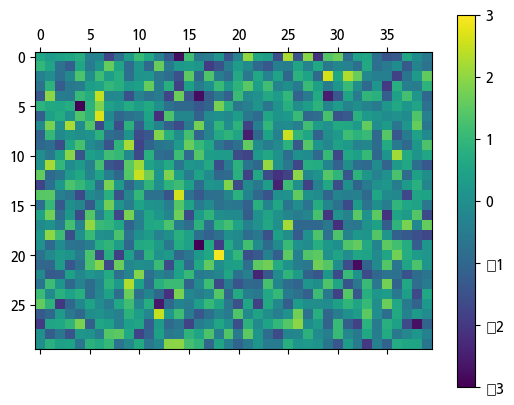

In [204]:
# 컬러바 생성
arr = np.random.standard_normal((30,40))
plt.matshow(arr)
plt.colorbar()
plt.clim(-1.0, 1.0) # 색상의 범위 지정
plt.clim(-3.0,3.0)

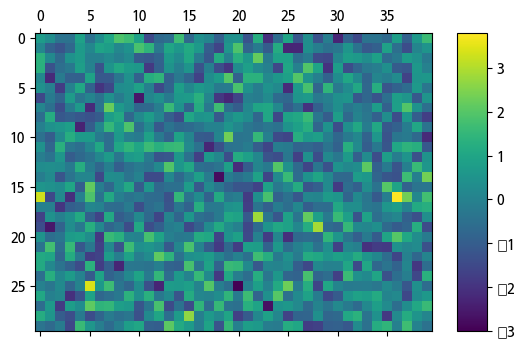

In [205]:
arr = np.random.standard_normal((30,40))
plt.matshow(arr)
plt.colorbar(shrink=0.8, aspect=10) # shrink : 컬러바의 크기 지정, aspect : 종횡비 지정

### plt.get_cmap 인자로 colormap을 지정할 수 있다.

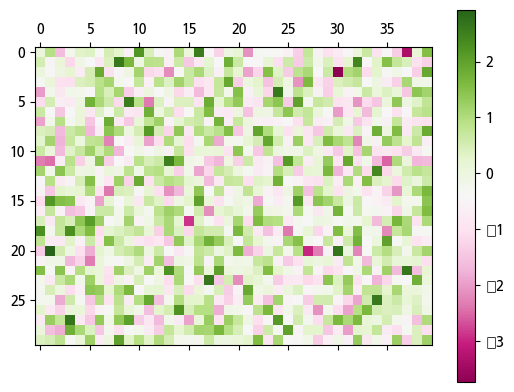

In [346]:
arr = np.random.standard_normal((30,40))
cmap = plt.get_cmap('PiYG')
# cmap = plt.get_cmap('BuGn')
# cmap = plt.get_cmap('Greys')
# cmap = plt.get_cmap('bwr')
plt.matshow(arr, cmap=cmap)
plt.colorbar()

[실습예제] flights는 연도(year)별, 월(month)별 승객 수(passengers)를 모아놓은 라는
seaborn에 내장되어 있는 데이터프레임이다.

In [349]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


• pivot() 함수를 이용하여 월별, 연도별 승객수를 집계한 피벗 테이블(pivot table)을 만들자. 그리고 이것을 이용하여 히트맵을 그려보자.

In [354]:
df = flights.pivot(index='month', columns='year', values='passengers')
df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


(1) matplotlib을 이용한 히트맵 그리기(Heatmap by matplotlib)  
• plt.pcolor() 함수를 이용하여 히트맵을 그리고, plt.colorbar()로 색상에 대한 정보를오른쪽에 제시하자.

In [394]:
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month 1,0.029243,0.766889,0.537688,0.799929,0.408868,0.665503,0.198804,0.191845,0.340262,0.519441
Month 2,0.716527,0.666805,0.821345,0.426397,0.912529,0.109168,0.187203,0.683718,0.253773,0.164591
Month 3,0.886494,0.068401,0.991471,0.862589,0.868258,0.628713,0.224856,0.798092,0.053801,0.582115
Month 4,0.439160,0.750407,0.023768,0.386786,0.477094,0.152359,0.414720,0.910478,0.468634,0.251776
Month 5,0.532335,0.060842,0.294269,0.783637,0.641914,0.023985,0.569876,0.217340,0.975750,0.783687
Month 6,0.127908,0.385546,0.489970,0.182372,0.704284,0.841379,0.004465,0.133223,0.283463,0.984110
Month 7,0.404528,0.170252,0.120927,0.901356,0.810244,0.619301,0.539696,0.777154,0.318151,0.639855
Month 8,0.736845,0.575649,0.168732,0.985905,0.811196,0.490627,0.619970,0.760076,0.458585,0.739116
Month 9,0.772928,0.459007,0.187768,0.597767,0.554289,0.500494,0.058582,0.777563,0.538708,0.430651
Month 10,0.814892,0.196885,0.271681,0.639727,0.390058,0.303069,0.254616,0.485731,0.775537,0.805326


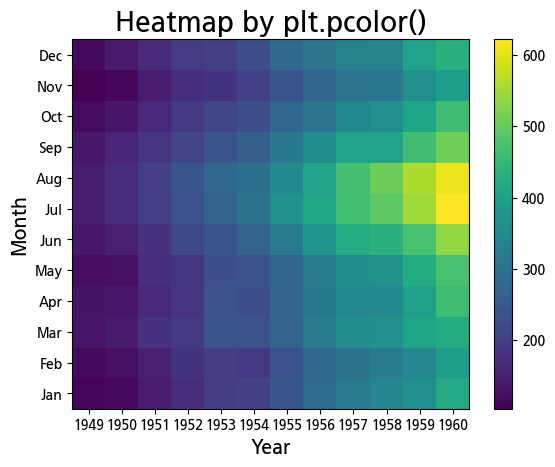

In [357]:
# heatmap by plt.pcolor()
plt.pcolor(df)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns) # index, 컬럼명
plt.yticks(np.arange(0.5, len(df.index), 1), df.index) # index, y- 
plt.title('Heatmap by plt.pcolor()', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.colorbar()
plt.show()

### ★ 위 히트맵 보고 최댓값 조건 인덱싱으로 찾아기기

In [367]:
df[6:]

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508
Oct,119,133,162,191,211,229,274,306,347,359,407,461
Nov,104,114,146,172,180,203,237,271,305,310,362,390
Dec,118,140,166,194,201,229,278,306,336,337,405,432


2 ) matshow() 함수를 사용하여 히트맵 그리기

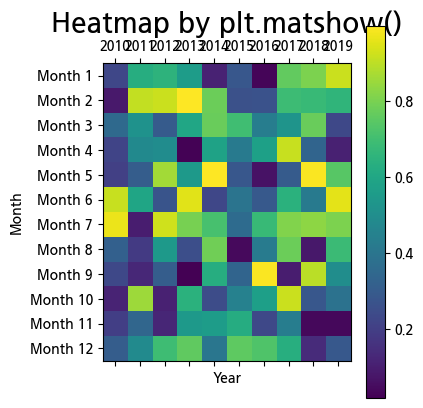

In [398]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 예시 데이터프레임 생성 (데이터프레임 df를 사용하여 변경하세요)
data = np.random.rand(12, 10)  # 예를 들어 12개월, 10년의 무작위 데이터
df = pd.DataFrame(data, columns=[str(year) for year in range(2010, 2020)], index=[f'Month {i}' for i in range(1, 13)])

# matshow로 히트맵 그리기
plt.matshow(df, cmap='viridis')  # cmap을 필요에 따라 조정하세요
plt.xticks(np.arange(len(df.columns)), df.columns)  # x축: 컬럼명
plt.yticks(np.arange(len(df.index)), df.index)      # y축: 인덱스
plt.title('Heatmap by plt.matshow()', fontsize=20)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Month', fontsize=10)
plt.colorbar()

plt.show()


### ★ matshow() 함수와 plt.pcolor() 함수의 차이점  
• matshow()는 2D 배열의 데이터를 매트릭스 형태로 시각화하는 데 최적화되어 있으며,  
기본적으로 그리드와 색상을 자동으로 설정한다.  
• plt.pcolor()는 더 많은 유연성을 제공하여, 각 셀의 위치와 색상을 세밀하게 조정할 수  
있지만, 약간의 성능 저하가 있을 수 있다.  
• matshow()는 간단한 히트맵을 그릴 때 유용하고, plt.pcolor()는 더 복잡한 시각화가  
필요할 때 적합하다.  